In [1]:
import numpy as np
import math
from matplotlib import rc
# rc('text', usetex=True)
import matplotlib.pylab as plt
plt.rcParams['font.size'] = 20
plt.rcParams['figure.dpi'] = 130
plt.rcParams['figure.figsize'] = [12, 8]
import scipy
from scipy.optimize import minimize_scalar, minimize,fsolve
from scipy.integrate import quad
# from scipy import stats
import seaborn as sns
import pandas as pd
%matplotlib inline


In [2]:
plt.rcParams.update({'figure.figsize':(12,8), 'figure.dpi':100})

In [3]:
import scipy.special as ssp
def mean(data):
    length = len(data)
    suma = sum(data)
    return suma/length
def variance(data):
    length = len(data)
    mean_i = mean(data)
    var = 0 
    for i in range(length):
        var = var + (data[i] - mean_i)**2
    return var/length
def skewness(data):
    length = len(data)
    mean_i = mean(data)
    var = variance(data)
    skw = 0 
    for i in range(length):
        skw = skw + (data[i] - mean_i)**3
    return skw/(length*var**3)

def correlation_coeff(data_x,data_y):
    prod_sum = 1
    mean_x = mean(data_x)
    mean_y = mean(data_y)
    var_x = variance(data_x)
    var_y = variance(data_y)
    print ("Mean and Variance",mean_x,mean_y,var_x,var_y)
    for i in range(len(data_x)):
        prod_sum = prod_sum*(data_x[i]-mean_x)*(data_y[i] -mean_y)
    return prod_sum/(np.sqrt(var_x)*np.sqrt(var_y))

def gaussian_dist(x,mu,sig):
    fac1 = 1/(np.sqrt(2*np.pi)*sig)
    fac2 = np.exp(- (x-mu)**2/(2*sig**2))
    return fac1*fac2

def chisq_n(chisq,k):
    if chisq> 0:
        temp1 = 2**(k/2.0)
        temp2 = ssp.gamma(k/2)
        temp3 = chisq**(k/2.0-1)
        temp4 = np.exp(-0.5*chisq)
        return temp3*temp4/(temp1*temp2)
    else:
        return 0
def chisq_prob(chisq,n):
    return quad(chisq_n,0.00,chisq,args=(n))[0]/quad(chisq_n,0.00,100,args=(n))[0]
def chisq(y_data,y_thr,y_sig):
    chisq = 0
    for i in range(len(y_data)):
        temp1 = (y_data[i]-y_thr[i])**2
        temp2 = y_sig[i]**2
        chisq = chisq + temp1/temp2
    return chisq
def chisqwithprob(chisq,prob,n):
    return  chisq_prob(chisq,n) -prob
    

In [4]:
chisq_prob(2.30,2)

0.6833632306209467

1
2
3
4
5


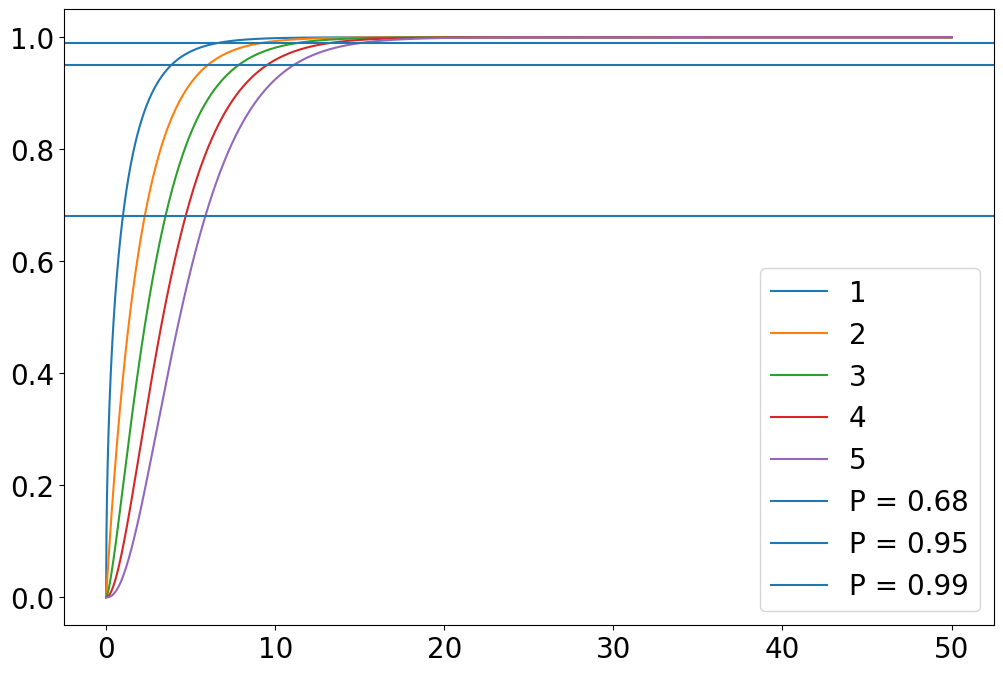

In [5]:
for i in range(1,6):
    print(i)
    chisqtry = np.linspace(0.00,50,5000)
    chisqn = np.zeros(len(chisqtry))
    for j in range(len(chisqtry)):
        chisqn[j] = chisq_prob(chisqtry[j],i)
    plt.plot(chisqtry,chisqn,label=str(i))
plt.axhline(0.68,xmin=0,xmax=chisqtry[-1],label='P = 0.68',ls='-')
plt.axhline(0.95,xmin=0,xmax=chisqtry[-1],label='P = 0.95',ls='-')
plt.axhline(0.99,xmin=0,xmax=chisqtry[-1],label='P = 0.99',ls='-')
plt.legend()


In [6]:
vals = [0.6827, 0.90, 0.95,0.9545,0.99,0.9973]
probchisq = np.zeros((6,6))
for i in range(1,7):
    for j in range(len(vals)):
        probchisq[i-1][j] = fsolve(chisqwithprob,0.0001,args=(vals[j],i))

C:\Users\mming\AppData\Local\Temp\ipykernel_18276\966602417.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  probchisq[i-1][j] = fsolve(chisqwithprob,0.0001,args=(vals[j],i))


In [7]:
prob_df = pd.DataFrame(np.round(probchisq.T,2),columns=np.arange(1,7),index=vals)

In [8]:
from IPython.display import display, HTML
display(HTML(prob_df.to_html()))

,1,2,3,4,5,6
0.6827,1.00,2.30,3.53,4.72,5.89,7.04
0.9000,2.71,4.61,6.25,7.78,9.24,10.64
0.9500,3.84,5.99,7.81,9.49,11.07,12.59
0.9545,4.00,6.18,8.02,9.72,11.31,12.85
0.9900,6.63,9.21,11.34,13.28,15.09,16.81
0.9973,9.00,11.83,14.16,16.25,18.21,20.06


In [9]:
def M1(x,a1,b1):
    return (a1*x)+(x**b1)+1
def M2(x,a2,b2,c2):
    return a2 * np.tanh(x-b2)+ c2       
def M3(x,a3,b3):
    return a3*x*(np.sin(x)+b3)+1  
def M4(x,a4,b4):
    return a4 + b4 * (1+x) 
def M5(x,a5,b5):
    return np.where(a5*(1+x)**3+b5 >= 0, np.sqrt(a5*(1+x)**3+b5 ), np.nan) 

In [10]:
prior = [-10,10]

In [11]:
data_1 = np.loadtxt("./regression_data_f.txt")
data_2 = np.loadtxt("./regression_data_h.txt")
data_3 = np.loadtxt("./regression_data_j.txt")
data_4 = np.loadtxt("./regression_data_k.txt")

In [12]:
data = [data_1,data_2,data_3,data_4]

In [13]:
def gridsampling(data_1,model,n,prior,m):
    if m == 2:
        chisqval = np.zeros((n,n))
        samp = np.linspace(prior[0],prior[1],n)
        for i in range(len(samp)):
            for j in range(len(samp)):
                chisqval[i,j] = chisq(data_1[:,1],model(data_1[:,0],samp[i],samp[j]),data_1[:,2])
    elif m ==3:
        chisqval = np.zeros((n,n,n))
        samp = np.linspace(prior[0],prior[1],n)
        for i in range(len(samp)):
            for j in range(len(samp)):
                for k in range(len(samp)):
                    chisqval[i,j,k] = chisq(data_1[:,1],model(data_1[:,0],samp[i],samp[j],samp[k]),data_1[:,2])
    else:
        print("Don't do it!")
        return
    return chisqval


In [14]:
def gridsamplingforconf(data_1,model,n,bestfit,m,ranges=0.1):
    if m == 2:
        chisqval = np.zeros((n,n))
        lwr = 1-ranges
        hwr = 1 + ranges
        samp1 = np.linspace(lwr*bestfit[0],hwr*bestfit[0],n)
        samp2 = np.linspace(lwr*bestfit[1],hwr*bestfit[1],n)
        for i in range(len(samp1)):
            for j in range(len(samp2)):
                chisqval[i,j] = chisq(data_1[:,1],model(data_1[:,0],samp1[i],samp2[j]),data_1[:,2])
    elif m ==3:
        chisqval = np.zeros((n,n,n))
        lwr = 1-ranges
        hwr = 1 + ranges
        samp1 = np.linspace(lwr*bestfit[0],hwr*bestfit[0],n)
        samp2 = np.linspace(lwr*bestfit[1],hwr*bestfit[1],n)
        samp3 = np.linspace(lwr*bestfit[2],hwr*bestfit[2],n)
        for i in range(len(samp1)):
            for j in range(len(samp2)):
                for k in range(len(samp3)):
                    chisqval[i,j,k] = chisq(data_1[:,1],model(data_1[:,0],samp1[i],samp2[j],samp3[k]),data_1[:,2])
    else:
        print("Don't do it!")
        return
    return chisqval

In [15]:
def gridsamplingforsamp(data_1,model,n,prior,m):
    if m == 2:
        chisqval = np.zeros((n,n))
        samp = np.linspace(prior[0],prior[1],n)
        for i in range(len(samp)):
            for j in range(len(samp)):
                chisqval[i,j] = chisq(data_1[:,1],model(data_1[:,0],samp[i],samp[j]),data_1[:,2])
    elif m ==3:
        chisqval = np.zeros((n,n,n))
        samp = np.linspace(prior[0],prior[1],n)
        for i in range(len(samp)):
            for j in range(len(samp)):
                for k in range(len(samp)):
                    chisqval[i,j,k] = chisq(data_1[:,1],model(data_1[:,0],samp[i],samp[j],samp[k]),data_1[:,2])
    else:
        print("Don't do it!")
        return
    return chisqval

In [16]:
def bestmodelfordata(data_1,n,prior):
    Models = [M1,M2,M3,M4,M5]
    restab = []
    for i in range(len(Models)):
        if Models[i] == M2:
            chisqval = gridsampling(data_1,Models[i],n,prior,3)
        else:
            chisqval = gridsampling(data_1,Models[i],n,prior,2)
        samp = np.linspace(prior[0],prior[1],n)
        ind = np.unravel_index(np.nanargmin(chisqval, axis=None,), chisqval.shape)
        if Models[i] != M2:
            print ('For Model',Models[i].__name__, '\ta= ',samp[ind[0]],'b =',samp[ind[1]],'Min(chisq) = ',chisqval[ind])
            restab.append([Models[i].__name__,samp[ind[0]],samp[ind[1]],np.nan,chisqval[ind]])
        else:
            print ('For Model',Models[i].__name__, '\ta= ',samp[ind[0]],'b =',samp[ind[1]],'c = ',samp[ind[2]],'Min(chisq) = ',chisqval[ind])
            restab.append([Models[i].__name__,samp[ind[0]],samp[ind[1]],samp[ind[2]],chisqval[ind]])
    return pd.DataFrame(restab, columns=['Model','a','b','c','Min(chisq)'])

In [17]:
import matplotlib.cm as cm
name = "Accent"
cmap = cm.get_cmap(name)  # type: matplotlib.colors.ListedColormap
colors = cmap.colors 

C:\Users\mming\AppData\Local\Temp\ipykernel_18276\556808531.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(name)  # type: matplotlib.colors.ListedColormap


In [18]:
sampnum = 100


data_results = []
data_results.append(bestmodelfordata(data_2,sampnum,prior))
data_results.append(bestmodelfordata(data_4,sampnum,prior))
print(data_results)

C:\Users\mming\AppData\Local\Temp\ipykernel_18276\4034625315.py:2: RuntimeWarning: divide by zero encountered in power
  return (a1*x)+(x**b1)+1


For Model M1 	a=  -0.10101010101010033 b = 1.3131313131313131 Min(chisq) =  841.7063331498521
For Model M2 	a=  2.929292929292929 b = 2.929292929292929 c =  4.545454545454545 Min(chisq) =  2430.0870039674373
For Model M3 	a=  -0.30303030303030276 b = -3.9393939393939394 Min(chisq) =  610.4223324840107
For Model M4 	a=  -1.1111111111111107 b = 1.5151515151515156 Min(chisq) =  832.1854736186701


C:\Users\mming\AppData\Local\Temp\ipykernel_18276\4034625315.py:10: RuntimeWarning: invalid value encountered in sqrt
  return np.where(a5*(1+x)**3+b5 >= 0, np.sqrt(a5*(1+x)**3+b5 ), np.nan)


For Model M5 	a=  0.30303030303030276 b = 0.9090909090909083 Min(chisq) =  269.24224697214424
For Model M1 	a=  0.7070707070707076 b = 0.10101010101010033 Min(chisq) =  1328.0118730162421
For Model M2 	a=  2.525252525252524 b = 0.7070707070707076 c =  2.3232323232323235 Min(chisq) =  359.89972704951055
For Model M3 	a=  0.7070707070707076 b = 1.9191919191919187 Min(chisq) =  106.54081825730428
For Model M4 	a=  2.3232323232323235 b = 0.5050505050505052 Min(chisq) =  1244.7190502883948
For Model M5 	a=  0.10101010101010033 b = 10.0 Min(chisq) =  1707.759885800275
[  Model         a         b         c   Min(chisq)
0    M1 -0.101010  1.313131       NaN   841.706333
1    M2  2.929293  2.929293  4.545455  2430.087004
2    M3 -0.303030 -3.939394       NaN   610.422332
3    M4 -1.111111  1.515152       NaN   832.185474
4    M5  0.303030  0.909091       NaN   269.242247,   Model         a          b         c   Min(chisq)
0    M1  0.707071   0.101010       NaN  1328.011873
1    M2  2.525253  

In [19]:
print(data_results)

[  Model         a         b         c   Min(chisq)
0    M1 -0.101010  1.313131       NaN   841.706333
1    M2  2.929293  2.929293  4.545455  2430.087004
2    M3 -0.303030 -3.939394       NaN   610.422332
3    M4 -1.111111  1.515152       NaN   832.185474
4    M5  0.303030  0.909091       NaN   269.242247,   Model         a          b         c   Min(chisq)
0    M1  0.707071   0.101010       NaN  1328.011873
1    M2  2.525253   0.707071  2.323232   359.899727
2    M3  0.707071   1.919192       NaN   106.540818
3    M4  2.323232   0.505051       NaN  1244.719050
4    M5  0.101010  10.000000       NaN  1707.759886]


In [20]:
chisqdata =[]
Models= [M1,M2,M3,M4,M5]
ms = [2,3,2,2,2]
for i in range(len(Models)):
    temp = gridsamplingforconf(data_2,Models[i],100,data_results[0][['a','b','c']].iloc[i].to_list(),ms[i],ranges=1)
    chisqdata.append(temp - temp.min())
    
#print(chisqdata)

In [34]:
print(chisqdata)

[array([[  93069.43318276,   91296.70742489,   89618.78820994, ...,
        4820441.42745703, 5274372.16549023, 5768202.3150968 ],
       [  93414.57632444,   91638.77964109,   89957.67855667, ...,
        4818045.81528334, 5271869.27097598, 5765587.98776059],
       [  93760.4169848 ,   91981.54937597,   90297.26642208, ...,
        4815650.90062834, 5269367.07398042, 5762974.35794307],
       ...,
       [ 129795.96494355,  127725.35941436,  125738.79886029, ...,
        4591314.69362742, 5034839.0446259 , 5517860.21050239],
       [ 130208.7673981 ,  128135.09094344,  126145.3485199 , ...,
        4588986.74076661, 5032403.80942452, 5515313.54247906],
       [ 130622.26737135,  128545.51999121,  126552.59569819, ...,
        4586659.4854245 , 5029969.27174184, 5512767.57197441]]), array([[[ 214537.47962856,  207104.96504098,  199841.09575102, ...,
          278796.07035706,  287722.14963872,  296816.87421801],
        [ 214537.47962856,  207104.96504098,  199841.09575102, ...,
     

In [21]:
#sns.heatmap(pd.DataFrame(chisqdata[0],index=samp,columns=samp))

[-0.10101010101010033, 1.3131313131313131, nan]
[[  93069.43318276   91296.70742489   89618.78820994 ... 4820441.42745703
  5274372.16549023 5768202.3150968 ]
 [  93414.57632444   91638.77964109   89957.67855667 ... 4818045.81528334
  5271869.27097598 5765587.98776059]
 [  93760.4169848    91981.54937597   90297.26642208 ... 4815650.90062834
  5269367.07398042 5762974.35794307]
 ...
 [ 129795.96494355  127725.35941436  125738.79886029 ... 4591314.69362742
  5034839.0446259  5517860.21050239]
 [ 130208.7673981   128135.09094344  126145.3485199  ... 4588986.74076661
  5032403.80942452 5515313.54247906]
 [ 130622.26737135  128545.51999121  126552.59569819 ... 4586659.4854245
  5029969.27174184 5512767.57197441]]
[2.3, 4.61, 5.99, 6.18, 9.21, 11.83]


C:\Users\mming\AppData\Local\Temp\ipykernel_18276\2654648885.py:20: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  CS.collections[i].set_label(str(np.round(vals[i]*100,2)) + '%')


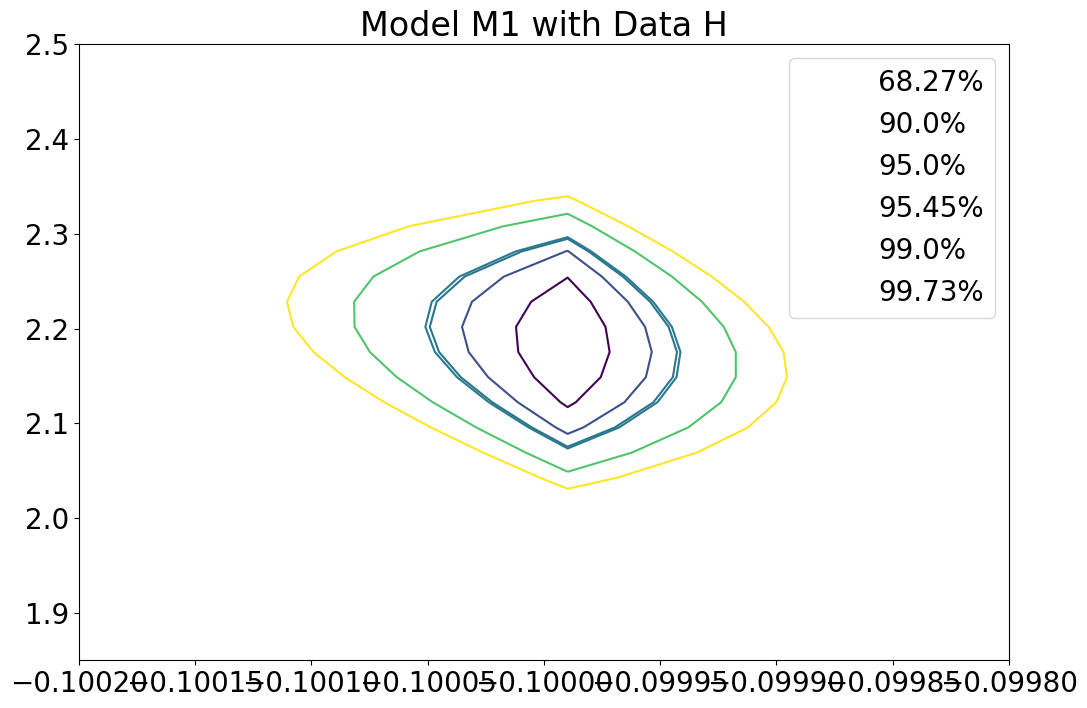

In [22]:
rng = 1
bestft = data_results[0][['a','b','c']].iloc[0].to_list()
print(bestft)
lwr = 1- rng
hwr = 1 + rng
n = 100
samp1 = np.linspace(lwr*bestft[0],hwr*bestft[0],n)
samp2 = np.linspace(lwr*bestft[1],hwr*bestft[1],n)
samp3 = np.linspace(lwr*bestft[2],hwr*bestft[2],n)
X, Y = np.meshgrid(samp1, samp2)
fig, ax = plt.subplots()
CS =  ax.contour(X,Y,chisqdata[0],levels=prob_df[2].to_list())
print(chisqdata[0])
print(prob_df[2].to_list())
# ax.clabel(CS,inline=True)
ax.set_xlim([-0.1002,-0.0998])
ax.set_ylim([1.85,2.5])
ax.set_title('Model M1 with Data H')
for i in range(len(vals)):
    CS.collections[i].set_label(str(np.round(vals[i]*100,2)) + '%')
plt.legend()

C:\Users\mming\AppData\Local\Temp\ipykernel_18276\1047796329.py:17: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  CS.collections[i].set_label(str(np.round(vals[i]*100,2)) + '%')


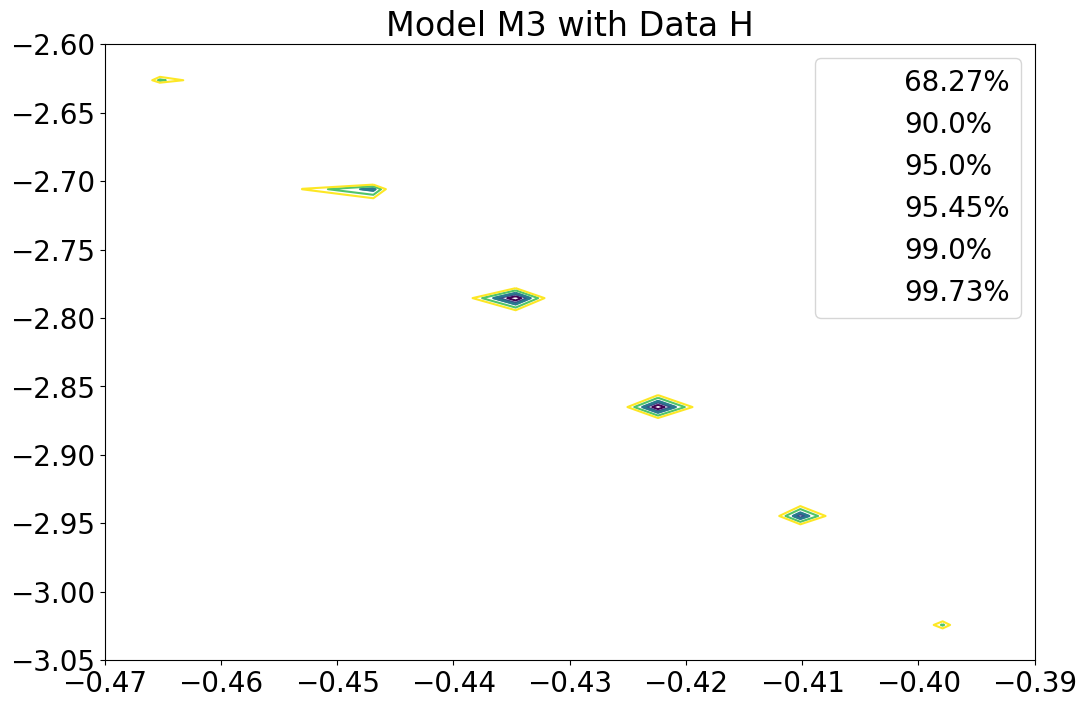

In [23]:
rng = 1
bestft = data_results[0][['a','b','c']].iloc[2].to_list()
lwr = 1- rng
hwr = 1 + rng
n = 100
samp1 = np.linspace(lwr*bestft[0],hwr*bestft[0],n)
samp2 = np.linspace(lwr*bestft[1],hwr*bestft[1],n)
samp3 = np.linspace(lwr*bestft[2],hwr*bestft[2],n)
X, Y = np.meshgrid(samp1, samp2)
fig, ax = plt.subplots()
CS =  ax.contour(X,Y,chisqdata[2],levels=prob_df[2].to_list())
# ax.clabel(CS,inline=True, fontsize=30)
ax.set_xlim([-0.47,-0.39])
ax.set_ylim([-3.05,-2.6])
ax.set_title('Model M3 with Data H')
for i in range(len(vals)):
    CS.collections[i].set_label(str(np.round(vals[i]*100,2)) + '%')
plt.legend()

C:\Users\mming\AppData\Local\Temp\ipykernel_18276\2707256020.py:17: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  CS.collections[i].set_label(str(np.round(vals[i]*100,2)) + '%')


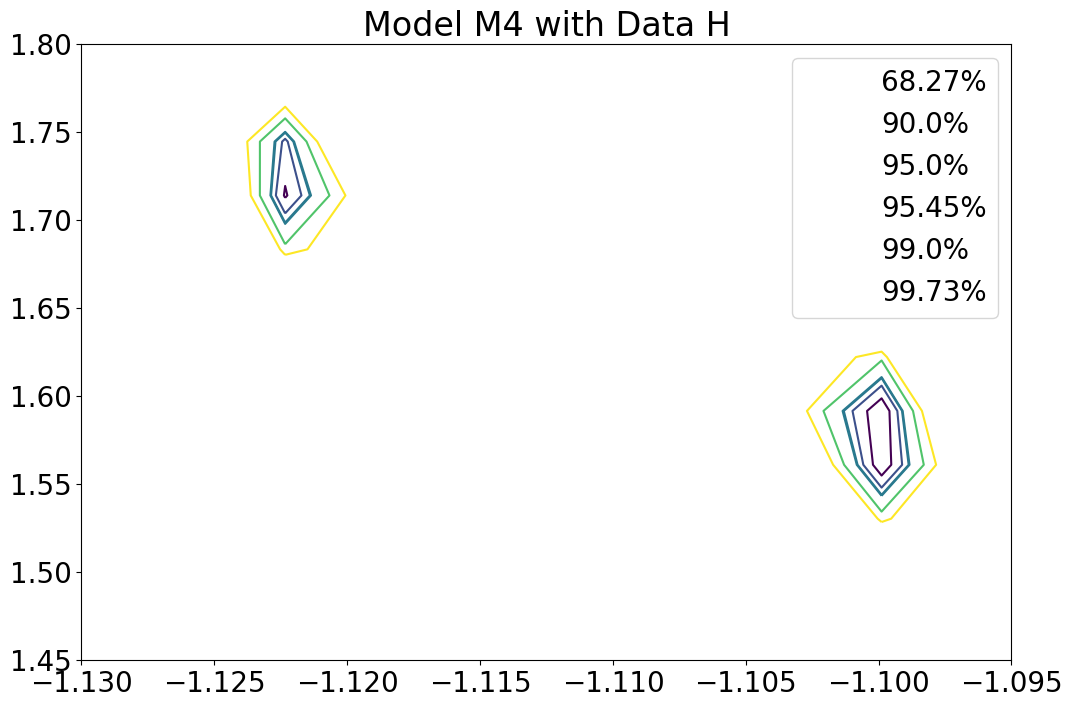

In [24]:
rng = 1
bestft = data_results[0][['a','b','c']].iloc[3].to_list()
lwr = 1- rng
hwr = 1 + rng
n = 100
samp1 = np.linspace(lwr*bestft[0],hwr*bestft[0],n)
samp2 = np.linspace(lwr*bestft[1],hwr*bestft[1],n)
samp3 = np.linspace(lwr*bestft[2],hwr*bestft[2],n)
X, Y = np.meshgrid(samp1, samp2)
fig, ax = plt.subplots()
CS =  ax.contour(X,Y,chisqdata[3],levels=prob_df[2].to_list())
ax.clabel(CS,inline=True, fontsize=30)
ax.set_xlim([-1.13,-1.095])
ax.set_ylim([1.45,1.8])
ax.set_title('Model M4 with Data H')
for i in range(len(vals)):
    CS.collections[i].set_label(str(np.round(vals[i]*100,2)) + '%')
plt.legend()

C:\Users\mming\AppData\Local\Temp\ipykernel_18276\2498047100.py:17: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  CS.collections[i].set_label(str(np.round(vals[i]*100,2)) + '%')


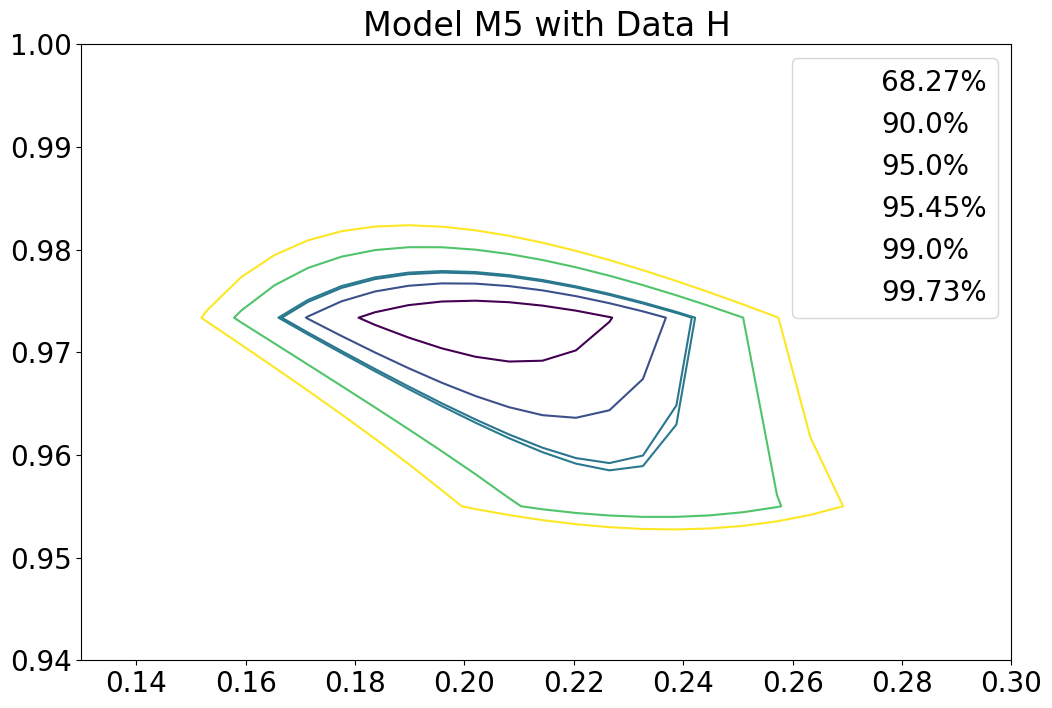

In [25]:
rng = 1
bestft = data_results[0][['a','b','c']].iloc[4].to_list()
lwr = 1- rng
hwr = 1 + rng
n = 100
samp1 = np.linspace(lwr*bestft[0],hwr*bestft[0],n)
samp2 = np.linspace(lwr*bestft[1],hwr*bestft[1],n)
samp3 = np.linspace(lwr*bestft[2],hwr*bestft[2],n)
X, Y = np.meshgrid(samp1, samp2)
fig, ax = plt.subplots()
CS =  ax.contour(X,Y,chisqdata[4],levels=prob_df[2].to_list())
# ax.clabel(CS,inline=True, fontsize=30)
ax.set_xlim([0.13,0.3])
ax.set_ylim([0.94,1.0])
ax.set_title('Model M5 with Data H')
for i in range(len(vals)):
    CS.collections[i].set_label(str(np.round(vals[i]*100,2)) + '%')
plt.legend()

In [26]:
chisqdata2 =[]
Models= [M1,M2,M3,M4,M5]
ms = [2,3,2,2,2]
for i in range(len(Models)):
    temp = gridsamplingforconf(data_4,Models[i],100,data_results[1][['a','b','c']].iloc[i].to_list(),ms[i],ranges=1)
    chisqdata2.append(temp - temp.min())

C:\Users\mming\AppData\Local\Temp\ipykernel_18276\2948910244.py:17: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  CS.collections[i].set_label(str(np.round(vals[i]*100,2)) + '%')


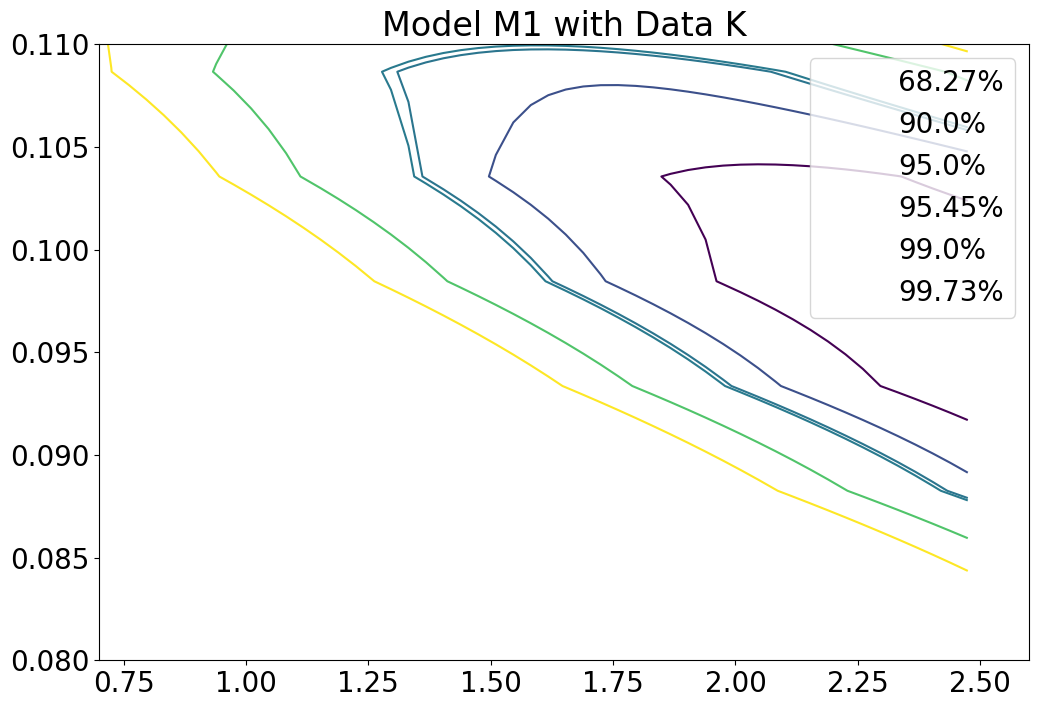

In [27]:
rng = 2.5
bestft = data_results[1][['a','b','c']].iloc[0].to_list()
lwr = 1- rng
hwr = 1 + rng
n = 100
samp1 = np.linspace(lwr*bestft[0],hwr*bestft[0],n)
samp2 = np.linspace(lwr*bestft[1],hwr*bestft[1],n)
samp3 = np.linspace(lwr*bestft[2],hwr*bestft[2],n)
X, Y = np.meshgrid(samp1, samp2)
fig, ax = plt.subplots()
CS =  ax.contour(X,Y,chisqdata2[0],levels=prob_df[2].to_list())
# ax.clabel(CS,inline=True, fontsize=30)
ax.set_xlim([0.7,2.6])
ax.set_ylim([0.08,0.11])
ax.set_title('Model M1 with Data K')
for i in range(len(vals)):
    CS.collections[i].set_label(str(np.round(vals[i]*100,2)) + '%')
plt.legend()

C:\Users\mming\AppData\Local\Temp\ipykernel_18276\2500731788.py:17: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  CS.collections[i].set_label(str(np.round(vals[i]*100,2)) + '%')


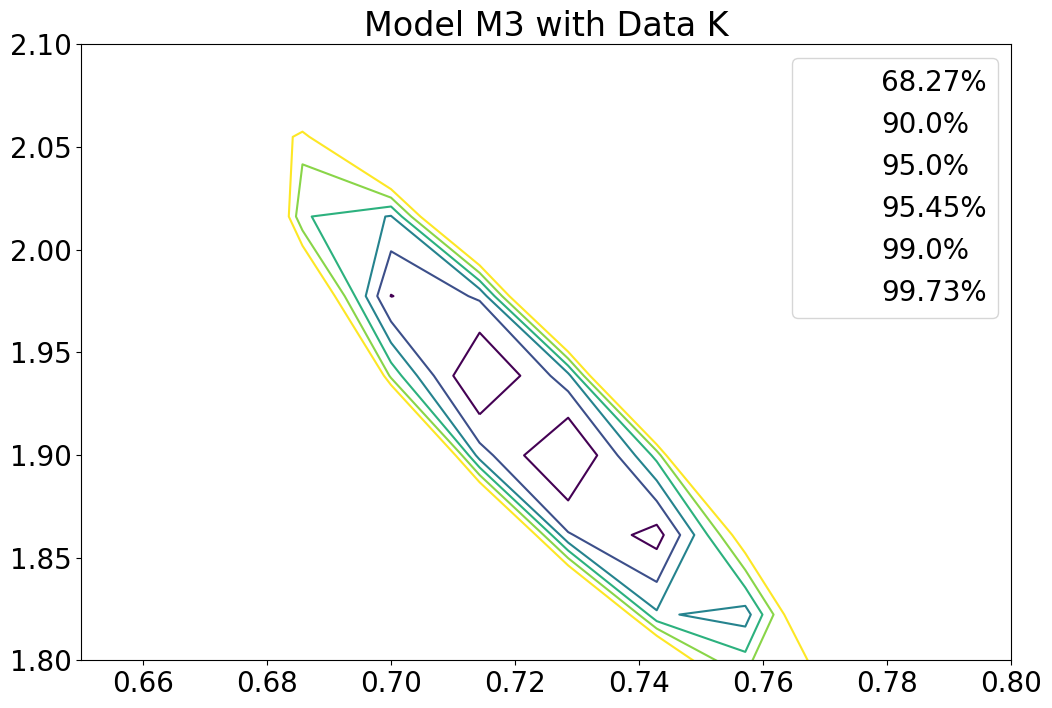

In [28]:
rng = 1
bestft = data_results[1][['a','b','c']].iloc[2].to_list()
lwr = 1- rng
hwr = 1 + rng
n = 100
samp1 = np.linspace(lwr*bestft[0],hwr*bestft[0],n)
samp2 = np.linspace(lwr*bestft[1],hwr*bestft[1],n)
samp3 = np.linspace(lwr*bestft[2],hwr*bestft[2],n)
X, Y = np.meshgrid(samp1, samp2)
fig, ax = plt.subplots()
CS =  ax.contour(X,Y,chisqdata2[2],levels=prob_df.iloc[1].to_list())
ax.clabel(CS,inline=True, fontsize=30)
ax.set_xlim([0.65,0.8])
ax.set_ylim([1.8,2.1])
ax.set_title('Model M3 with Data K')
for i in range(len(vals)):
    CS.collections[i].set_label(str(np.round(vals[i]*100,2)) + '%')
plt.legend()

C:\Users\mming\AppData\Local\Temp\ipykernel_18276\1229189084.py:17: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  CS.collections[i].set_label(str(np.round(vals[i]*100,2)) + '%')


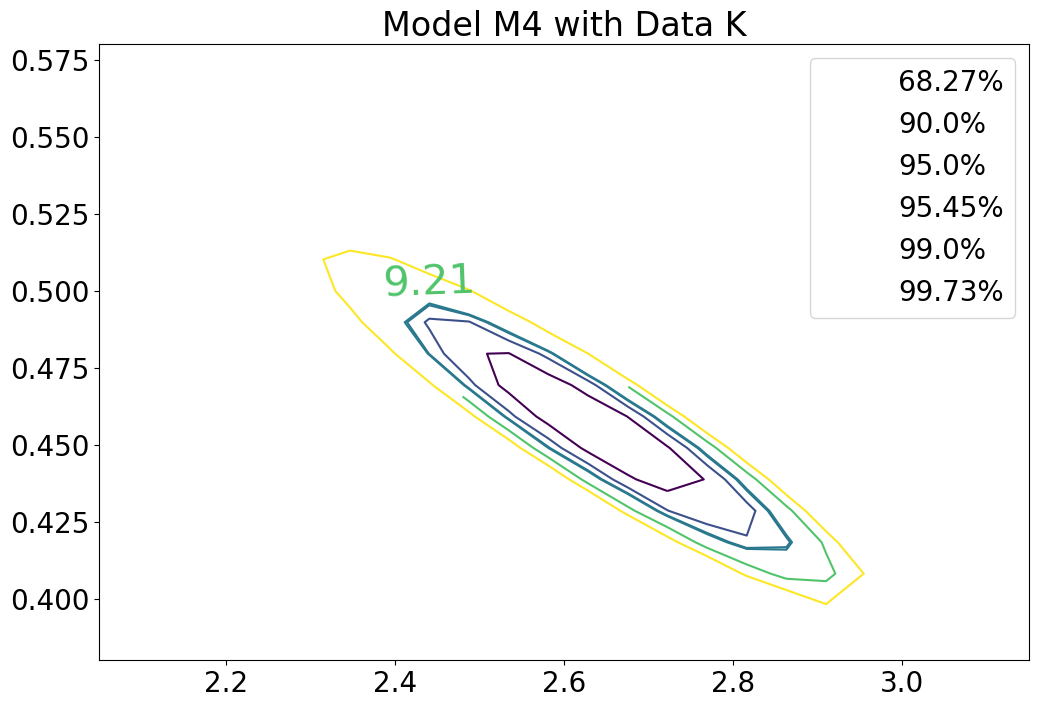

In [29]:
rng = 1
bestft = data_results[1][['a','b','c']].iloc[3].to_list()
lwr = 1- rng
hwr = 1 + rng
n = 100
samp1 = np.linspace(lwr*bestft[0],hwr*bestft[0],n)
samp2 = np.linspace(lwr*bestft[1],hwr*bestft[1],n)
samp3 = np.linspace(lwr*bestft[2],hwr*bestft[2],n)
X, Y = np.meshgrid(samp1, samp2)
fig, ax = plt.subplots()
CS =  ax.contour(X,Y,chisqdata2[3],levels=prob_df[2].to_list())
ax.clabel(CS,inline=True, fontsize=30)
ax.set_xlim([2.05,3.15])
ax.set_ylim([0.38,0.58])
ax.set_title('Model M4 with Data K')
for i in range(len(vals)):
    CS.collections[i].set_label(str(np.round(vals[i]*100,2)) + '%')
plt.legend()

C:\Users\mming\AppData\Local\Temp\ipykernel_18276\3586810029.py:17: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  CS.collections[i].set_label(str(np.round(vals[i]*100,2)) + '%')


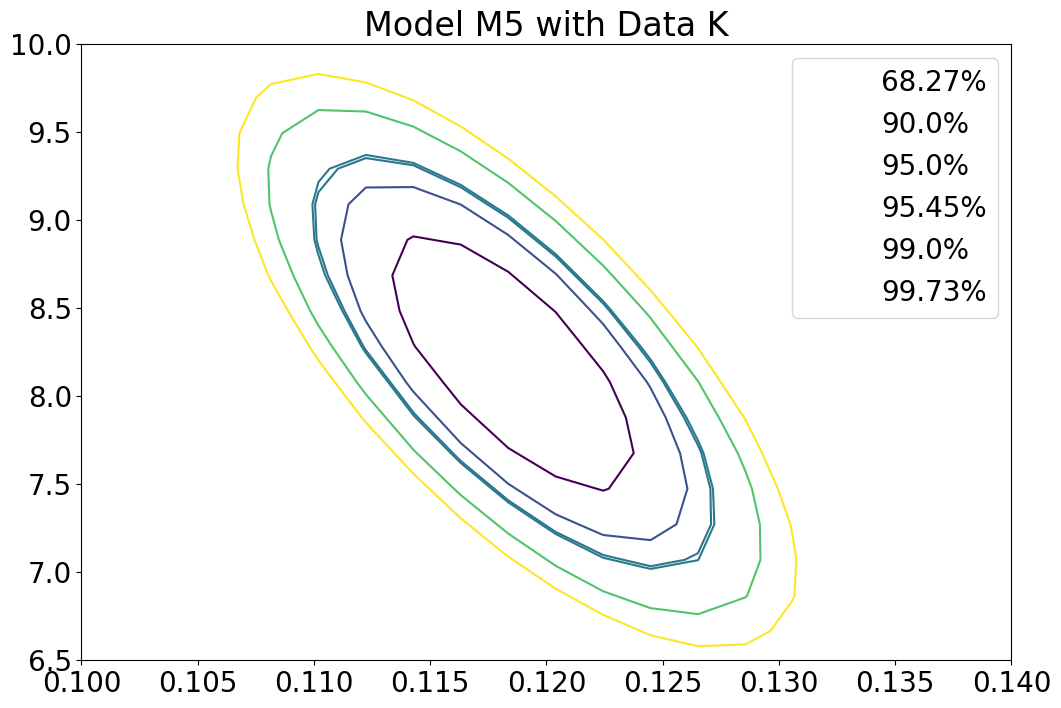

In [30]:
rng = 1
bestft = data_results[1][['a','b','c']].iloc[4].to_list()
lwr = 1- rng
hwr = 1 + rng
n = 100
samp1 = np.linspace(lwr*bestft[0],hwr*bestft[0],n)
samp2 = np.linspace(lwr*bestft[1],hwr*bestft[1],n)
samp3 = np.linspace(lwr*bestft[2],hwr*bestft[2],n)
X, Y = np.meshgrid(samp1, samp2)
fig, ax = plt.subplots()
CS =  ax.contour(X,Y,chisqdata2[4],levels=prob_df[2].to_list())
ax.clabel(CS,inline=True, fontsize=30)
ax.set_ylim([6.5,10.0])
ax.set_xlim([0.1,0.140])
ax.set_title('Model M5 with Data K')
for i in range(len(vals)):
    CS.collections[i].set_label(str(np.round(vals[i]*100,2)) + '%')
plt.legend()

In [31]:
rng = 1
bestft = data_results[1][['a','b','c']].iloc[4].to_list()
lwr = 1- rng
hwr = 1 + rng
n = 100
m =2
samp1 = np.linspace(lwr*bestft[0],hwr*bestft[0],n)
samp2 = np.linspace(lwr*bestft[1],hwr*bestft[1],n)
samp3 = np.linspace(lwr*bestft[2],hwr*bestft[2],n)
mask =[]
for i in range(len(samp1)):
    for j in range(len(samp2)):
        if chisqdata[4][i,j] < prob_df[2].to_list()[4]:
                mask.append([i,j])
    

In [32]:
prob_df[2].to_list()[4]

9.21

In [33]:
for i in range()

SyntaxError: expected ':' (1816844243.py, line 1)

In [ ]:
len(mask)

23

In [ ]:
chisqdata[4][mask[0][0],mask[0][1]]

2.8149652785277084

In [ ]:
chisqdata[4][1,2]

64499.46542371919

In [ ]:
m3 = m2data1 - m2data1.min()

In [ ]:
data_results[0]['Min(chisq)']

0     841.706333
1    2430.087004
2     610.422332
3     832.185474
4     269.242247
Name: Min(chisq), dtype: float64

In [ ]:
m2data1.min()

113.47590393770248

In [ ]:
data_results[0][['a','b','c']].iloc[3].to_list()

[-1.1111111111111107, 1.5151515151515156, nan]

In [ ]:
samp = np.linspace(prior[0],prior[1],100)
chisqprob = np.zeros(m2data1.shape)
for i in range(m2data1.shape[0]):
    for j in range(m2data1.shape[1]):
        chisqprob[i][j] = m2data1[i][j] - data_results[0]['Min(chisq)'][3]
    

In [ ]:
data_results[0]['Min(chisq)'][3]

832.1854736186701

(40, 60)

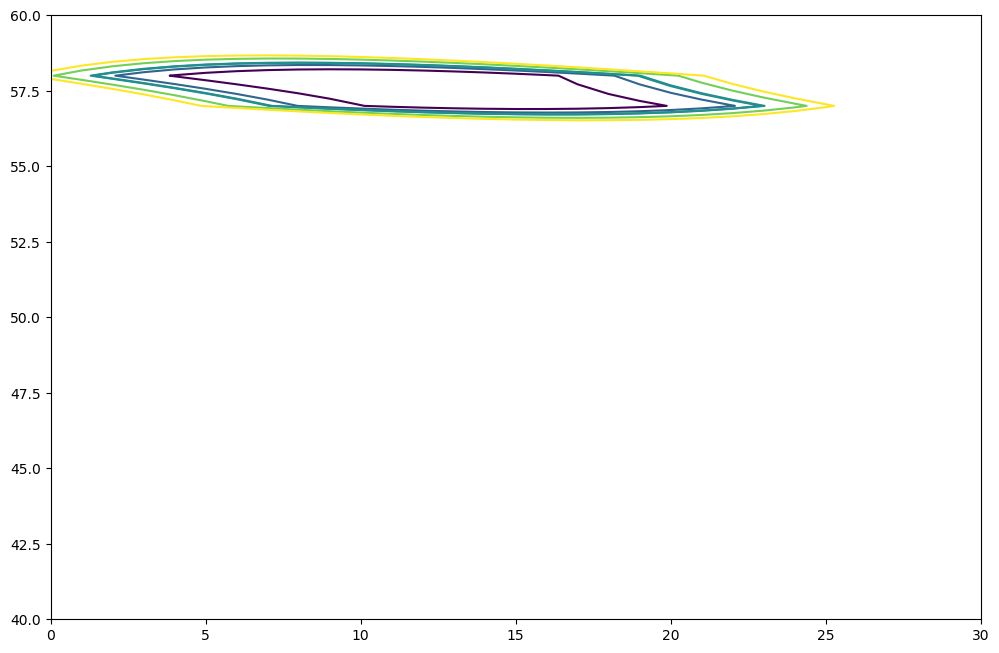

In [ ]:
plt.contour(m3,levels=prob_df.iloc[1].to_list())
plt.xlim([0,30])
plt.ylim([40,60])

In [ ]:
chisqval = gridsampling(data_1,M1,21,prior,2)
samp = np.linspace(prior[0],prior[1],21)

ind = np.unravel_index(np.nanargmin(chisqval, axis=None), chisqval.shape)

print ('a= ',samp[ind[0]],'b =',samp[ind[1]],'Min(chisq) = ',chisqval[ind])

a=  0.0 b = 1.0 Min(chisq) =  116.84369151480325


/home/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  
/home/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in reciprocal
  


In [ ]:
data_results[0]['Min(chisq)'][2]

610.4223324840107

In [ ]:
data_results[0]

,Model,a,b,c,Min(chisq)
0,M1,-0.101010,1.313131,NaN,841.706333
1,M2,2.929293,2.929293,4.545455,2430.087004
2,M3,-0.303030,-3.939394,NaN,610.422332
3,M4,-1.111111,1.515152,NaN,832.185474
4,M5,0.303030,0.909091,NaN,269.242247


In [ ]:
data_results[1]

,Model,a,b,c,Min(chisq)
0,M1,0.707071,0.101010,NaN,1328.011873
1,M2,2.525253,0.707071,2.323232,359.899727
2,M3,0.707071,1.919192,NaN,106.540818
3,M4,2.323232,0.505051,NaN,1244.719050
4,M5,0.101010,10.000000,NaN,1707.759886


In [ ]:
data_results[3]

,Model,a,b,c,Min(chisq)
0,M1,0.707071,0.101010,NaN,1328.011873
1,M2,2.525253,0.707071,2.323232,359.899727
2,M3,0.707071,1.919192,NaN,106.540818
3,M4,2.323232,0.505051,NaN,1244.719050
4,M5,0.101010,10.000000,NaN,1707.759886


In [ ]:
modeldict = {'M1':M1, 'M2':M2, 'M3':M3, 'M4':M4, 'M5':M5}
datadict = {0:'Data F',1:'Data H',2:'Data J',3:'Data K'}

Text(0, 0.5, 'y')

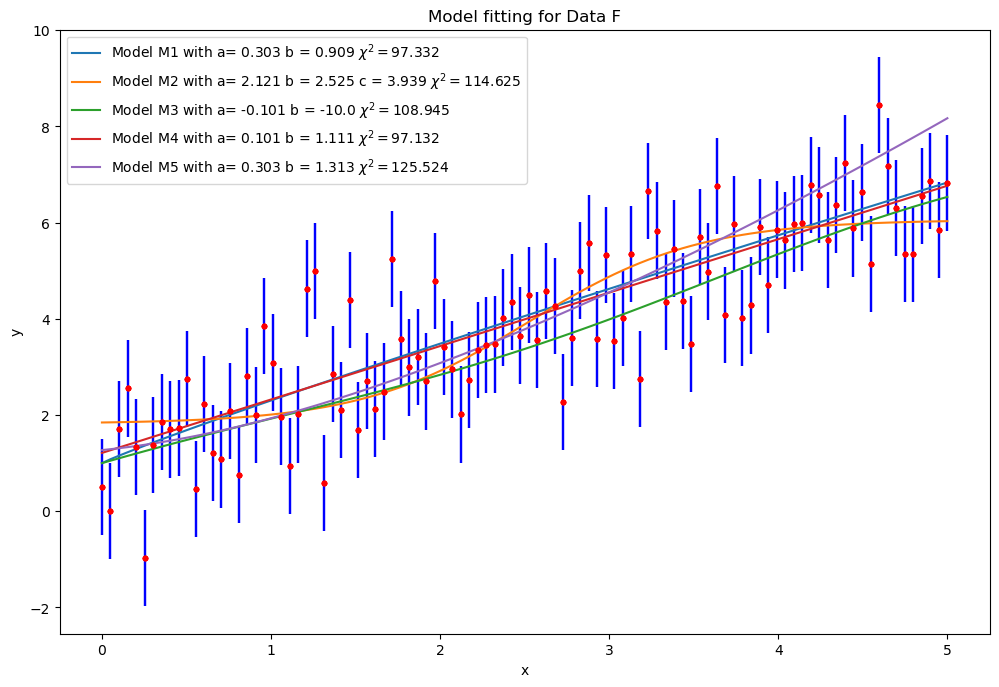

In [ ]:
for i in range(data_results[0].shape[0]):
    if data_results[0]['Model'][i] != 'M2':
        y_mod = modeldict[data_results[0]['Model'][i]](data[0][:,0],data_results[0]['a'][i],data_results[0]['b'][i] )
        lbl = 'Model ' + data_results[0]['Model'][i] + ' with a= ' + str(np.round(data_results[0]['a'][i],3)) + ' b = ' + str(np.round(data_results[0]['b'][i],3)) +' $\chi^2 = $' + str(np.round(data_results[0]['Min(chisq)'][i],3))
    else:
        y_mod = modeldict[data_results[0]['Model'][i]](data[0][:,0],data_results[0]['a'][i],data_results[0]['b'][i], data_results[0]['c'][i] )
        lbl = 'Model ' + data_results[0]['Model'][i] + ' with a= ' + str(np.round(data_results[0]['a'][i],3)) + ' b = ' + str(np.round(data_results[0]['b'][i],3)) + ' c = ' + str(np.round(data_results[0]['c'][i],3))  + ' $\chi^2 = $' + str(np.round(data_results[0]['Min(chisq)'][i],3))
    plt.errorbar(data[0][:,0],data[0][:,1],yerr=(data[0][:,2],data[0][:,2]),fmt='r.',ecolor='blue')
    
    plt.plot(data[0][:,0],y_mod,label=lbl)
plt.legend()
plt.title("Model fitting for "+ datadict[0])
plt.xlabel("x")
plt.ylabel("y")

Text(0, 0.5, 'y')

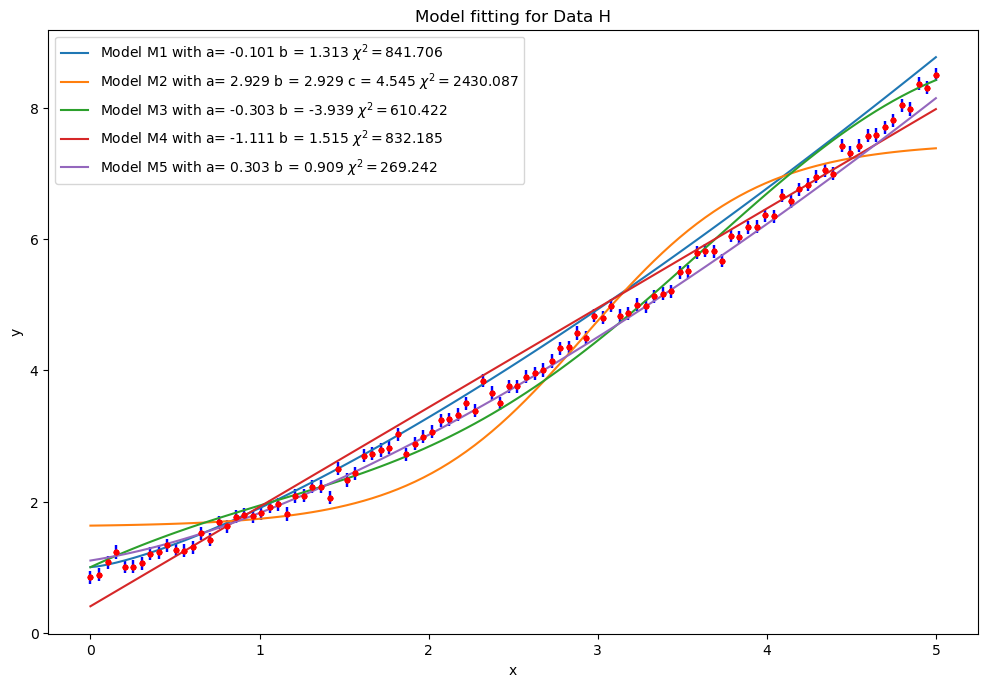

In [ ]:
k = 1
for i in range(data_results[k].shape[0]):
    if data_results[k]['Model'][i] != 'M2':
        y_mod = modeldict[data_results[k]['Model'][i]](data[k][:,0],data_results[k]['a'][i],data_results[k]['b'][i] )
        lbl = 'Model ' + data_results[k]['Model'][i] + ' with a= ' + str(np.round(data_results[k]['a'][i],3)) + ' b = ' + str(np.round(data_results[k]['b'][i],3)) +' $\chi^2 = $' + str(np.round(data_results[k]['Min(chisq)'][i],3))
    else:
        y_mod = modeldict[data_results[k]['Model'][i]](data[k][:,0],data_results[k]['a'][i],data_results[k]['b'][i], data_results[k]['c'][i] )
        lbl = 'Model ' + data_results[k]['Model'][i] + ' with a= ' + str(np.round(data_results[k]['a'][i],3)) + ' b = ' + str(np.round(data_results[k]['b'][i],3)) + ' c = ' + str(np.round(data_results[1]['c'][i],3))  + ' $\chi^2 = $' + str(np.round(data_results[1]['Min(chisq)'][i],3))
    plt.errorbar(data[k][:,0],data[k][:,1],yerr=(data[k][:,2],data[k][:,2]),fmt='r.',ecolor='blue')
    
    plt.plot(data[k][:,0],y_mod,label=lbl)
plt.legend()
plt.title("Model fitting for "+ datadict[k])
plt.xlabel("x")
plt.ylabel("y")

Text(0, 0.5, 'y')

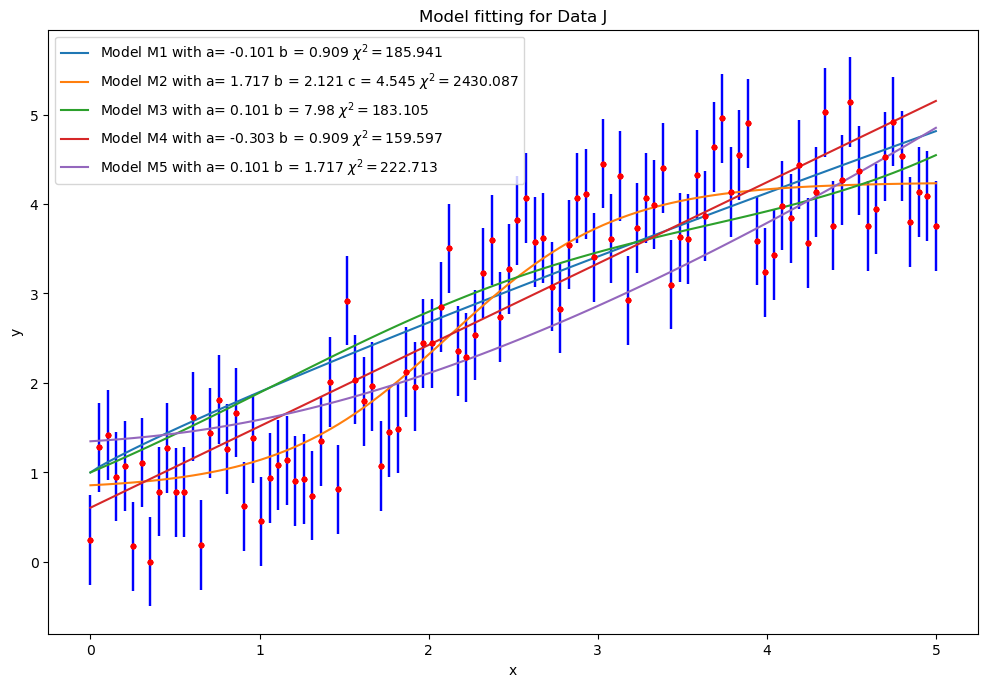

In [ ]:
k = 2
for i in range(data_results[k].shape[0]):
    if data_results[k]['Model'][i] != 'M2':
        y_mod = modeldict[data_results[k]['Model'][i]](data[k][:,0],data_results[k]['a'][i],data_results[k]['b'][i] )
        lbl = 'Model ' + data_results[k]['Model'][i] + ' with a= ' + str(np.round(data_results[k]['a'][i],3)) + ' b = ' + str(np.round(data_results[k]['b'][i],3)) +' $\chi^2 = $' + str(np.round(data_results[k]['Min(chisq)'][i],3))
    else:
        y_mod = modeldict[data_results[k]['Model'][i]](data[k][:,0],data_results[k]['a'][i],data_results[k]['b'][i], data_results[k]['c'][i] )
        lbl = 'Model ' + data_results[k]['Model'][i] + ' with a= ' + str(np.round(data_results[k]['a'][i],3)) + ' b = ' + str(np.round(data_results[k]['b'][i],3)) + ' c = ' + str(np.round(data_results[1]['c'][i],3))  + ' $\chi^2 = $' + str(np.round(data_results[1]['Min(chisq)'][i],3))
    plt.errorbar(data[k][:,0],data[k][:,1],yerr=(data[k][:,2],data[k][:,2]),fmt='r.',ecolor='blue')
    
    plt.plot(data[k][:,0],y_mod,label=lbl)
plt.legend()
plt.title("Model fitting for "+ datadict[k])
plt.xlabel("x")
plt.ylabel("y")

Text(0, 0.5, 'y')

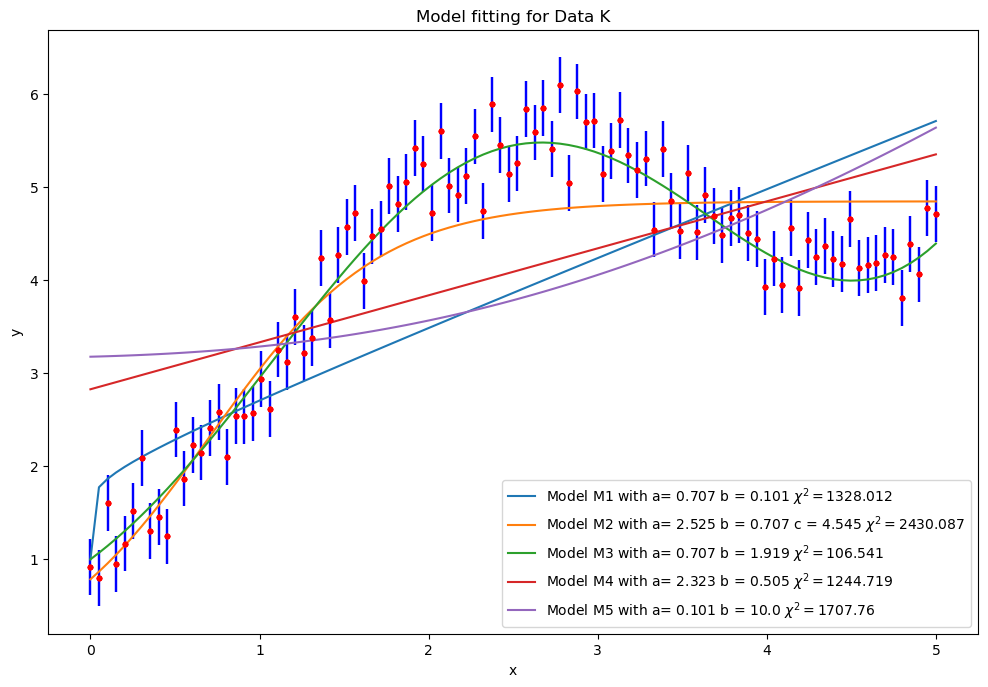

In [ ]:
k = 3
for i in range(data_results[k].shape[0]):
    if data_results[k]['Model'][i] != 'M2':
        y_mod = modeldict[data_results[k]['Model'][i]](data[k][:,0],data_results[k]['a'][i],data_results[k]['b'][i] )
        lbl = 'Model ' + data_results[k]['Model'][i] + ' with a= ' + str(np.round(data_results[k]['a'][i],3)) + ' b = ' + str(np.round(data_results[k]['b'][i],3)) +' $\chi^2 = $' + str(np.round(data_results[k]['Min(chisq)'][i],3))
    else:
        y_mod = modeldict[data_results[k]['Model'][i]](data[k][:,0],data_results[k]['a'][i],data_results[k]['b'][i], data_results[k]['c'][i] )
        lbl = 'Model ' + data_results[k]['Model'][i] + ' with a= ' + str(np.round(data_results[k]['a'][i],3)) + ' b = ' + str(np.round(data_results[k]['b'][i],3)) + ' c = ' + str(np.round(data_results[1]['c'][i],3))  + ' $\chi^2 = $' + str(np.round(data_results[1]['Min(chisq)'][i],3))
    plt.errorbar(data[k][:,0],data[k][:,1],yerr=(data[k][:,2],data[k][:,2]),fmt='r.',ecolor='blue')
    
    plt.plot(data[k][:,0],y_mod,label=lbl)
plt.legend()
plt.title("Model fitting for "+ datadict[k])
plt.xlabel("x")
plt.ylabel("y")

In [ ]:
data_results[0][['b']].shape

(5, 1)

In [ ]:
ind = np.unravel_index(np.argmin(chisqval, axis=None), chisqval.shape)

In [ ]:
chisqval[ind]

0.03139982324323135

In [ ]:
(df.min(axis=1).idxmin(), df.min().idxmin())

(1.0, 0.0)

In [ ]:
df.min()

-10.0    -0.390084
-9.0     -0.390085
-8.0     -0.390090
-7.0     -0.390115
-6.0     -0.390240
-5.0     -0.390862
-4.0     -0.393977
-3.0     -0.409625
-2.0     -0.489756
-1.0     -0.947060
 0.0     -3.460953
 1.0     -0.390084
 2.0     -0.390084
 3.0      8.473343
 4.0     12.688384
 5.0     16.058330
 6.0     19.306097
 7.0     22.530701
 8.0     25.750721
 9.0     28.969825
 10.0    32.188747
dtype: float64

In [ ]:
df[0.0][1.0]

-3.4609530152802273

Text(0.5, 1, 'Log Likelihood for Model 1 and Data f')

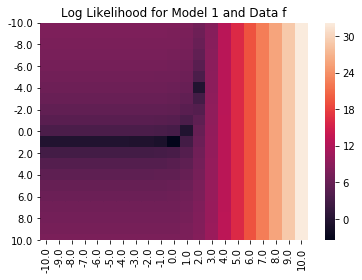

In [ ]:
sns.heatmap(df)
plt.title("Log Likelihood for Model 1 and Data f")

In [ ]:
chisqval.max(), chisqval.argmin()

(95368294478513.19, 210)

In [ ]:
from scipy.integrate import quad

In [ ]:
I = quad(gaussian_dist,-1,1,args=(0,1))[0]/quad(gaussian_dist,-1000,1000,args=(0,1))[0]

In [ ]:
data_1[0]

array([0.        , 0.51146261, 1.        ])

In [ ]:
len(data_2),len(data_2),len(data_2)

(100, 100, 100)

### For Dataset 1

In [ ]:
mean(data_1[:,0]) ,mean(data_1[:,1])

(0.012658290865752991, 0.02810010088078657)

In [ ]:
np.mean(data_1[:,0]),np.mean(data_1[:,1]),np.std(data_1[:,0]),np.std(data_1[:,1])

(0.012658290865753001,
 0.028100100880786568,
 1.9769046788146818,
 3.0041961930171084)

In [ ]:
from scipy.stats import pearsonr
print("Correlation of data_1 by \n Method 1 ={} \n Method_2 = {}".format(correlation_coeff(data_1[:,0],data_1[:,1]),pearsonr(data_1[:,0],data_1[:,1])))

Mean and Variance 0.012658290865752991 0.02810010088078657 3.9081521091193863 9.02519476613843
Correlation of data_1 by 
 Method 1 =inf 
 Method_2 = (0.011828879274542755, 0.23689578031700978)


/home/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in double_scalars


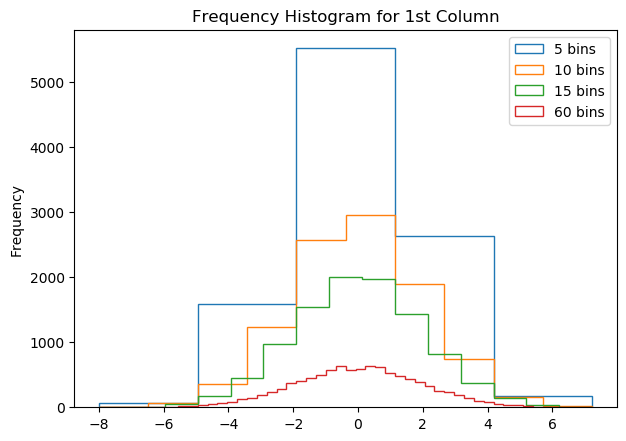

In [ ]:
plt.hist(data_1[:,0], bins=5,histtype='step',label='5 bins')
plt.hist(data_1[:,0], bins=10,histtype='step',label='10 bins')
plt.hist(data_1[:,0], bins=15,histtype='step',label='15 bins')
plt.hist(data_1[:,0], bins=50,histtype='step',label='60 bins')

plt.gca().set(title='Frequency Histogram for 1st Column', ylabel='Frequency')
plt.legend();

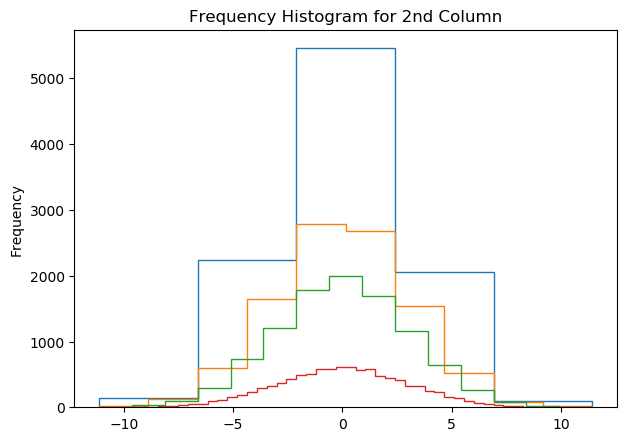

In [ ]:
plt.hist(data_1[:,1], bins=5,histtype='step')
plt.hist(data_1[:,1], bins=10,histtype='step')
plt.hist(data_1[:,1], bins=15,histtype='step')
plt.hist(data_1[:,1], bins=50,histtype='step')

plt.gca().set(title='Frequency Histogram for 2nd Column', ylabel='Frequency');

In [ ]:
def plot_class2_data(data_1):
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(12,6))
    ax1.hist(data_1[:,0], bins=5,histtype='step',label='5 bins')
    ax1.hist(data_1[:,0], bins=10,histtype='step',label='10 bins')
    ax1.hist(data_1[:,0], bins=15,histtype='step',label='15 bins')
    ax1.hist(data_1[:,0], bins=50,histtype='step',label='60 bins')
    ax1.set_title('Frequency Histogram for 1st Column')
    ax1.set_ylabel('Frequency')
    ax2.hist(data_1[:,1], bins=5,histtype='step',label='5 bins')
    ax2.hist(data_1[:,1], bins=10,histtype='step',label='10 bins')
    ax2.hist(data_1[:,1], bins=15,histtype='step',label='15 bins')
    ax2.hist(data_1[:,1], bins=50,histtype='step',label='60 bins')
    ax2.set_title('Frequency Histogram for 2nd Column')
    ax2.set_ylabel('Frequency')
    plt.legend();

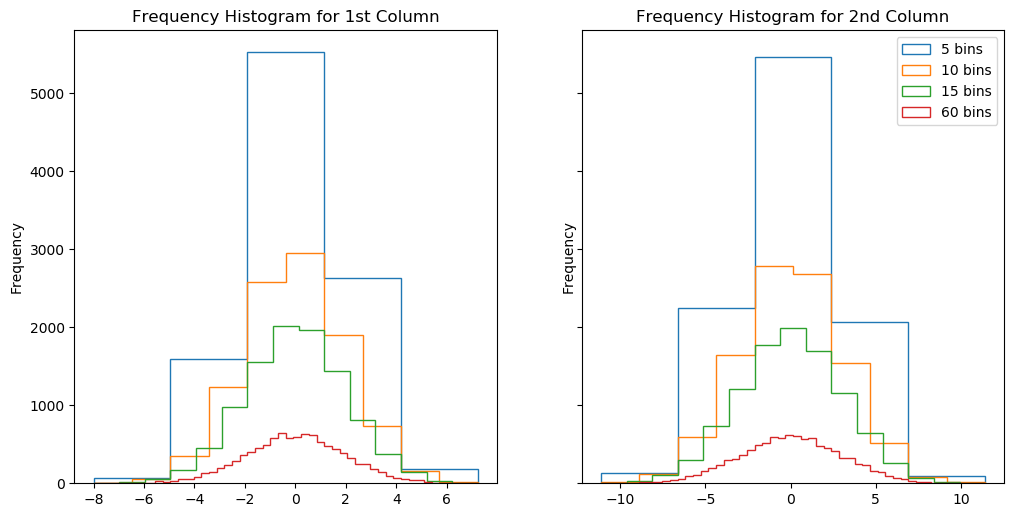

In [ ]:
plot_class2_data(data_1)

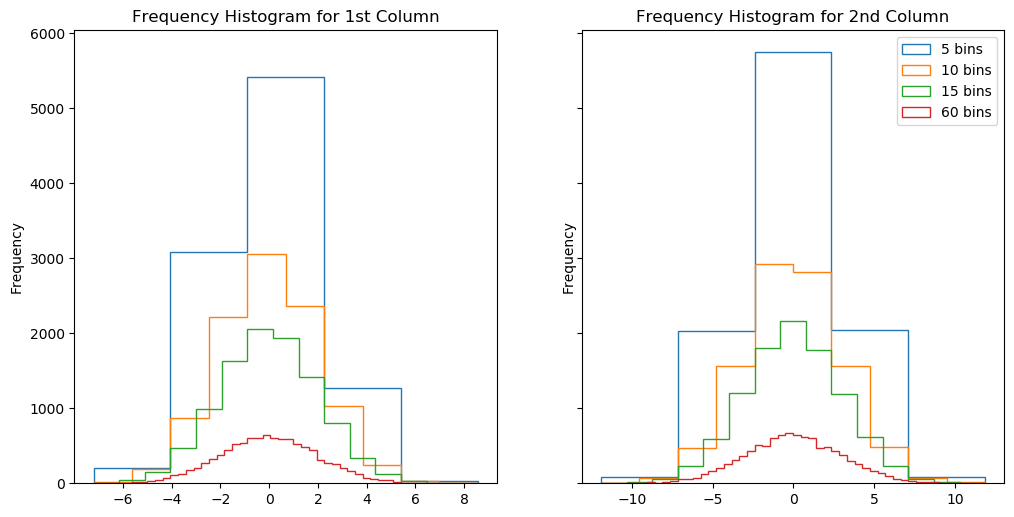

In [ ]:
plot_class2_data(data_2)

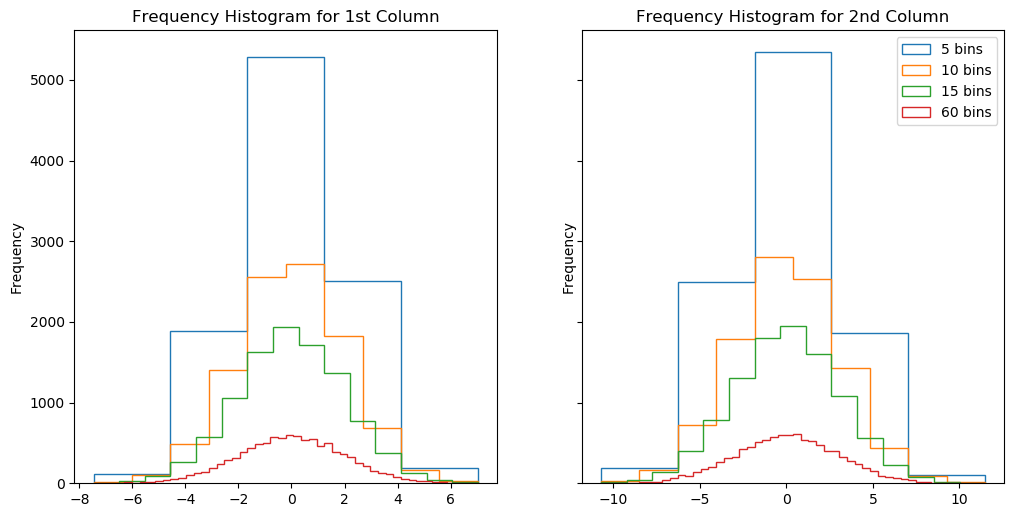

In [ ]:
plot_class2_data(data_3)

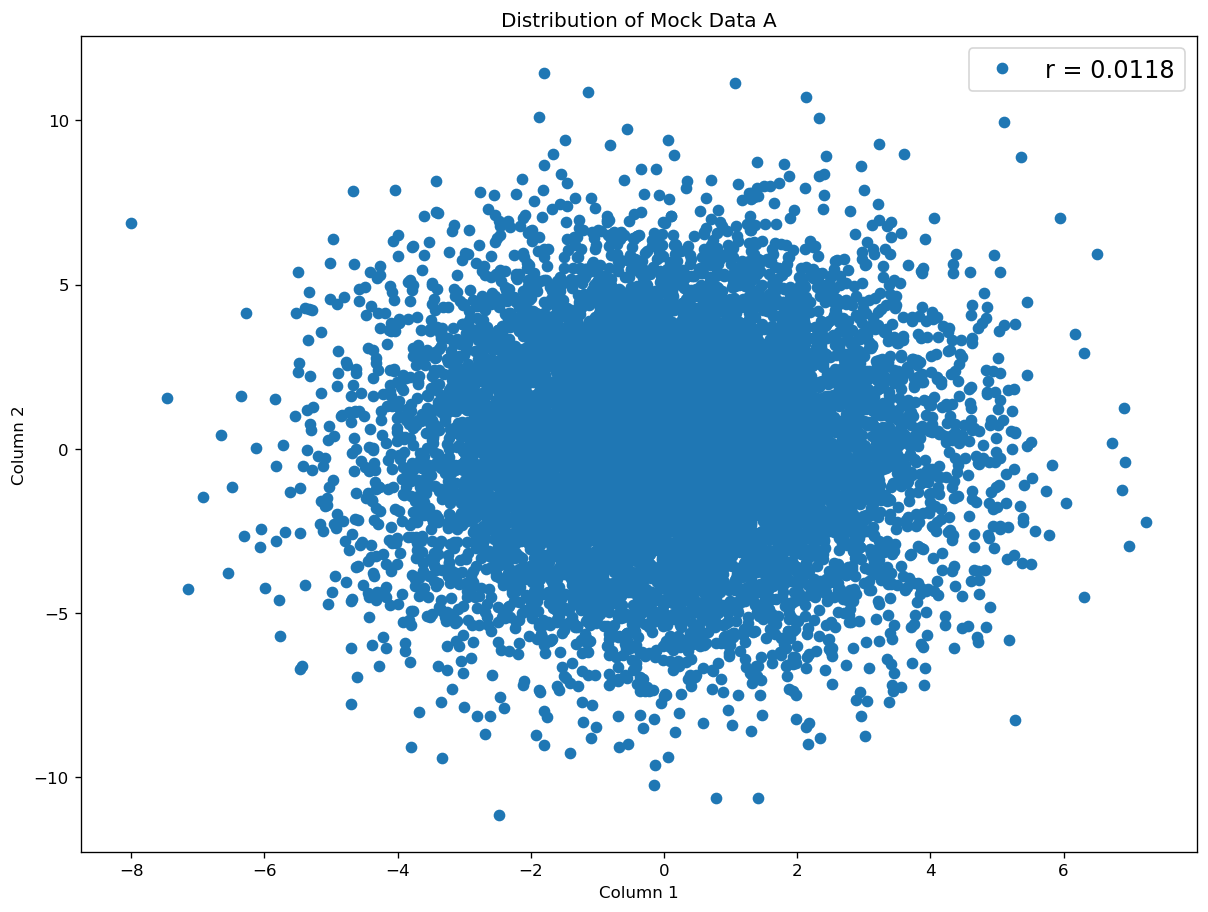

In [ ]:
plt.figure(figsize=(12,9),dpi=120)
plt.plot(data_1[:,0],data_1[:,1],'o',label="r = "+ str(round(pearsonr(data_1[:,0],data_1[:,1])[0],4)))
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.title('Distribution of Mock Data A')
plt.legend(fontsize='x-large')

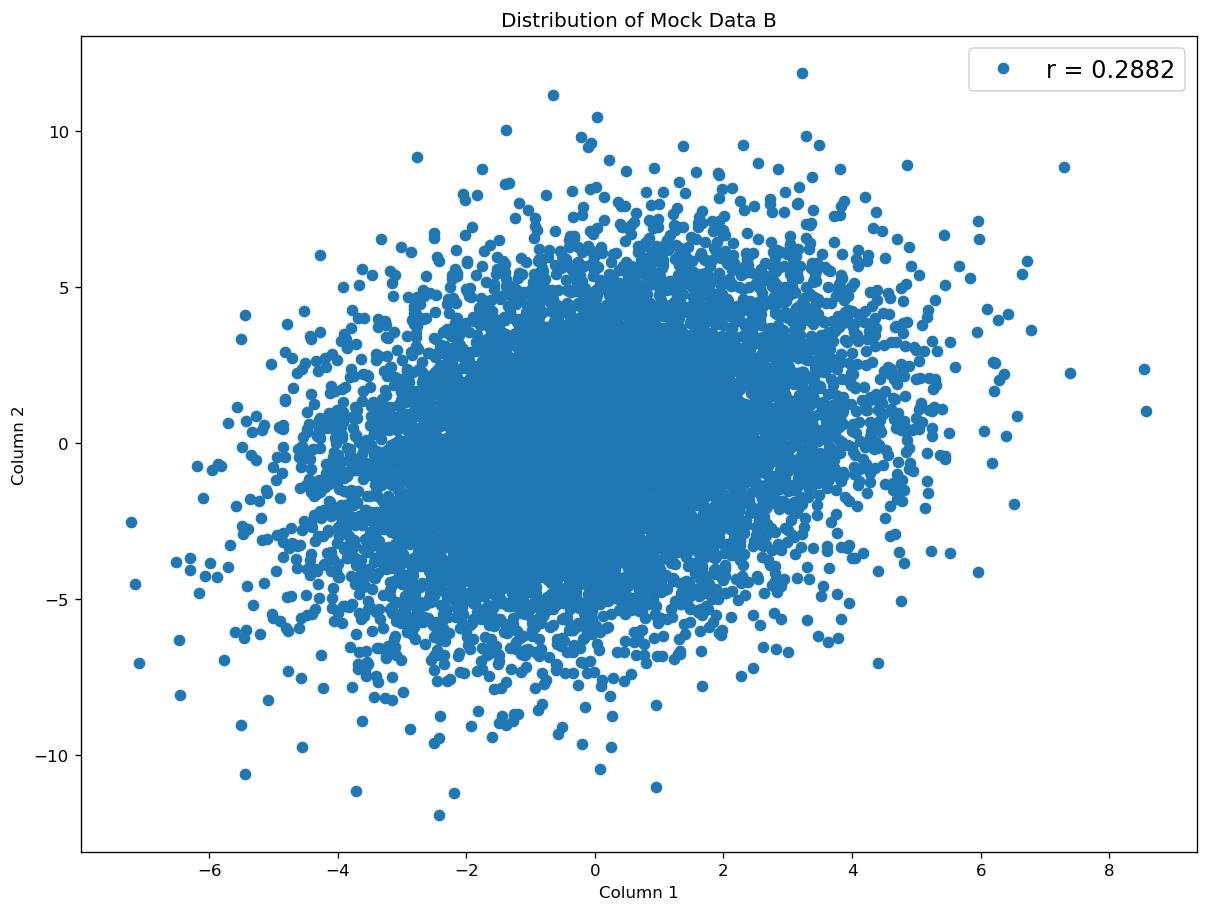

In [ ]:
plt.figure(figsize=(12,9),dpi=120)
plt.plot(data_2[:,0],data_2[:,1],'o',label="r = "+ str(round(pearsonr(data_2[:,0],data_2[:,1])[0],4)))
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.title('Distribution of Mock Data B')
plt.legend(fontsize='x-large')

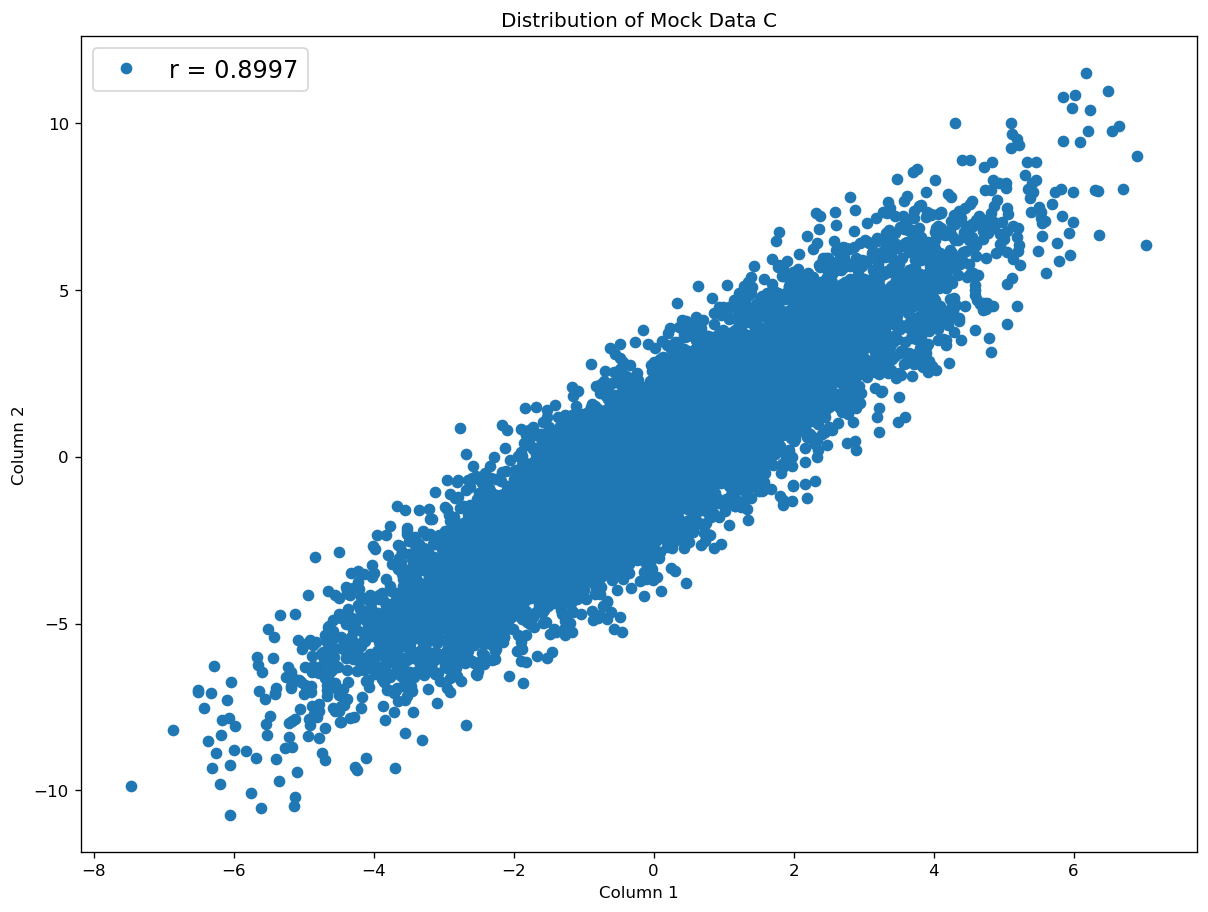

In [ ]:
plt.figure(figsize=(12,9),dpi=120)
plt.plot(data_3[:,0],data_3[:,1],'o',label="r = "+ str(round(pearsonr(data_3[:,0],data_3[:,1])[0],4)))
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.title('Distribution of Mock Data C')
plt.legend(fontsize='x-large')

In [ ]:
import math
def prob(p,n,r):
    return p**r*(1-p)**(n-r)*math.factorial(n)/(math.factorial(n-r)*math.factorial(r))

In [ ]:
prob(0.9,4,4)+prob(0.9,4,3)

0.9477

In [ ]:
+prob(0.9,4,3)

0.29159999999999997

In [ ]:
prob(0.9,4,4)

0.6561

In [ ]:
prob(5,5) + prob(5,4)+prob(5,3)

0.9988418749999998

In [ ]:
prob(0.9,5,3)

0.07289999999999998

In [ ]:
prob(0.9,5,4)

0.32804999999999995

In [ ]:
prob(0.9,5,5)

0.5904900000000001

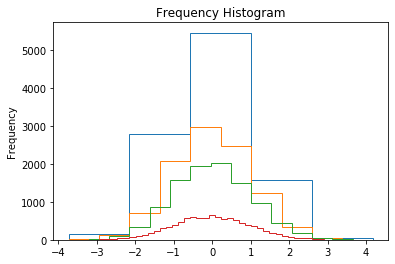

In [ ]:
plt.hist(data_2, bins=5,histtype='step')
plt.hist(data_2, bins=10,histtype='step')
plt.hist(data_2, bins=15,histtype='step')
plt.hist(data_2, bins=50,histtype='step')

plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

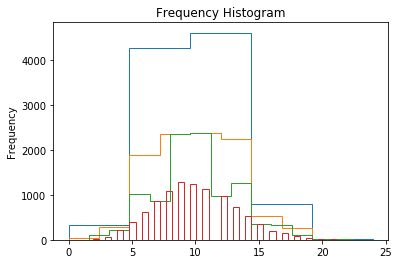

In [ ]:
plt.hist(data_3, bins=5,histtype='step')
plt.hist(data_3, bins=10,histtype='step')
plt.hist(data_3, bins=15,histtype='step')
plt.hist(data_3, bins=50,histtype='step')

plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

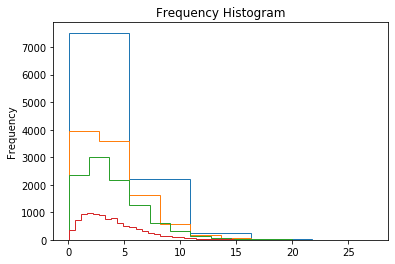

In [ ]:
plt.hist(data_4, bins=5,histtype='step')
plt.hist(data_4, bins=10,histtype='step')
plt.hist(data_4, bins=15,histtype='step')
plt.hist(data_4, bins=50,histtype='step')

plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

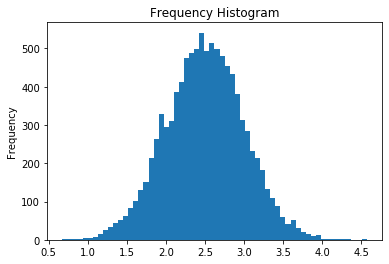

In [ ]:
plt.hist(data_1, bins=60)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

In [ ]:
# Mean
print("Mean of the dataset is ",mean(data_1))
# Median
print("Median of the dataset is ",np.median(data_1))
# Mode
print("Mode of the dataset is ",stats.mode(data_1)[0])
# Standard Deviation
print("Standard Deviation of the dataset is ",np.std(data_1))
# Variance
print("Variance of the dataset is ",variance(data_1))
# Skewness
print("Skewness of the dataset is ",skewness(data_1))
# Kurtosis
print("Kurtosis of the dataset is ",stats.kurtosis(data_1))



Mean of the dataset is  2.498734561848049
Median of the dataset is  2.502429616649482
Mode of the dataset is  [0.67345319]
Standard Deviation of the dataset is  0.49858760367950855
Variance of the dataset is  0.24858959854287538
Skewness of the dataset is  0.09470960737982036
Kurtosis of the dataset is  0.024118757477574526


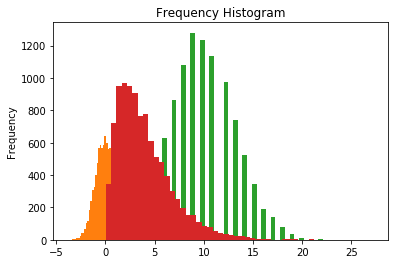

In [ ]:
plt.hist(data_1,bins=50)
plt.hist(data_2,bins=50)
plt.hist(data_3,bins=50)
plt.hist(data_4,bins=50)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

In [ ]:
def Geometric_mean(data_1):
    data_log = np.log(data_1)
    log_mean = mean(data_log)
    return np.exp(log_mean)

In [ ]:
a = Geometric_mean(data_1)
print(a)

2.4462111699371905


In [ ]:
def Stat_analysis(data_1):
    plt.figure(0)
    plt.hist(data_1, bins=10)
    plt.gca().set(title='Frequency Histogram', ylabel='Frequency');
    plt.figure(1)
    plt.hist(data_1, bins=60)
    plt.gca().set(title='Frequency Histogram', ylabel='Frequency');
    # Mean
    print("Mean of the dataset is ",mean(data_1))
    # Median
    print("Median of the dataset is ",np.median(data_1))
    # Mode
    print("Mode of the dataset is ",stats.mode(data_1)[0][0])
    # Standard Deviation
    print("Standard Deviation of the dataset is ",np.std(data_1))
    # Variance
    print("Variance of the dataset is ",variance(data_1))
    # Skewness
    print("Skewness of the dataset is ",skewness(data_1))
    # Kurtosis
    print("Kurtosis of the dataset is ",stats.kurtosis(data_1))

Mean of the dataset is  2.498734561848049
Median of the dataset is  2.502429616649482
Mode of the dataset is  0.6734531856690171
Standard Deviation of the dataset is  0.49858760367950855
Variance of the dataset is  0.24858959854287538
Skewness of the dataset is  0.09470960737982036
Kurtosis of the dataset is  0.024118757477574526


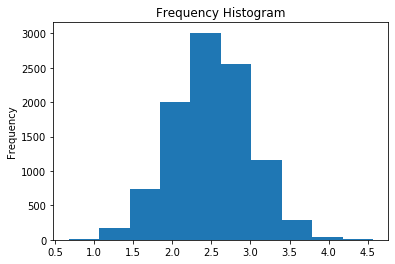

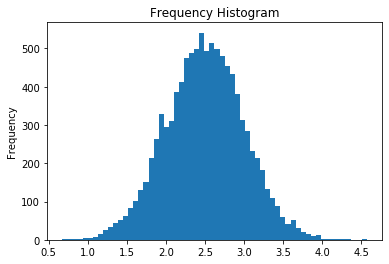

In [ ]:
Stat_analysis(data_1)

Mean of the dataset is  -0.00014846001134048625
Median of the dataset is  -0.012107505572214567
Mode of the dataset is  -3.735476599796913
Standard Deviation of the dataset is  1.0073293355164012
Variance of the dataset is  1.0147123901919113
Skewness of the dataset is  0.059754974333106545
Kurtosis of the dataset is  -0.04279666217256706


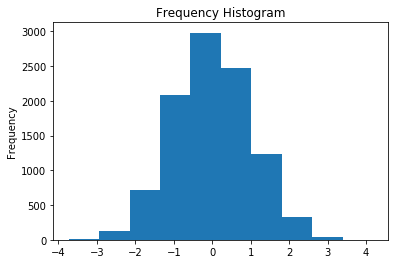

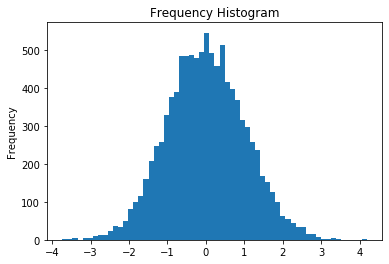

In [ ]:
Stat_analysis(data_2)

Mean of the dataset is  9.9772
Median of the dataset is  10.0
Mode of the dataset is  9.0
Standard Deviation of the dataset is  3.1616894471152603
Variance of the dataset is  9.996280160000028
Skewness of the dataset is  0.008305222197412029
Kurtosis of the dataset is  -0.006987586206224972


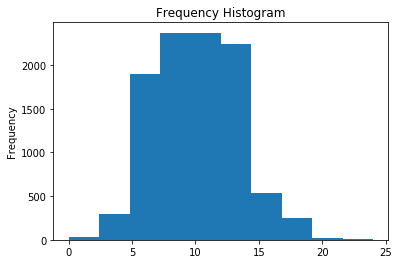

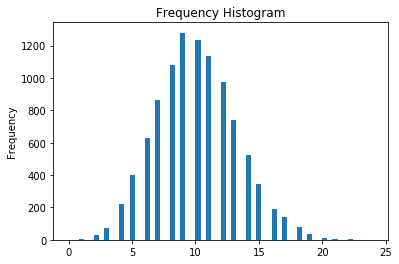

In [ ]:
Stat_analysis(data_3)

Mean of the dataset is  3.9935028796220444
Median of the dataset is  3.3652271344676468
Mode of the dataset is  0.0077590982505106884
Standard Deviation of the dataset is  2.822232512453022
Variance of the dataset is  7.9649963543468925
Skewness of the dataset is  0.06161936618802528
Kurtosis of the dataset is  2.917344575128311


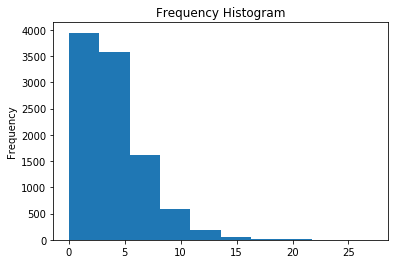

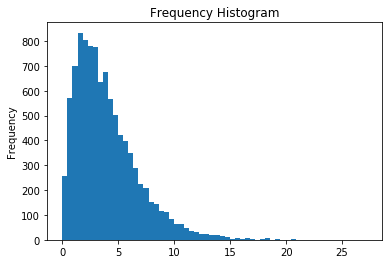

In [ ]:
Stat_analysis(data_4)

In [ ]:
def Stat_analysis_split(data_1,n=10):
    x= np.array_split(data_1,n)
#     plt.figure(0)
#     plt.hist(data_1, bins=10)
#     plt.gca().set(title='Frequency Histogram', ylabel='Frequency');
#     plt.figure(1)
#     plt.hist(data_1, bins=60)
#     plt.gca().set(title='Frequency Histogram', ylabel='Frequency');
    mean_arr = []
    median_arr = []
    mode_arr = []
    std_arr = []
    var_arr = []
    ske_arr = []
    kurt_arr = []
    for i in range(len(x)):
        mean_arr.append(mean(x[i]))
        median_arr.append(np.median(x[i]))
        mode_arr.append(stats.mode(x[i])[0][0])
        std_arr.append(np.std(x[i]))
        var_arr.append(variance(x[i]))
        ske_arr.append(skewness(x[i]))
        kurt_arr.append(stats.kurtosis(x[i]))
    df = pd.DataFrame({'Mean':mean_arr,'Median':median_arr,'Mode':mode_arr,'Std':std_arr,'Var':var_arr,'ske':ske_arr,'Kurt':kurt_arr})
    return df

In [ ]:
df_Split_1 = Stat_analysis_split(data_1,n=10)
df_Split_2 = Stat_analysis_split(data_2,n=10)
df_Split_3 = Stat_analysis_split(data_3,n=10)
df_Split_4 = Stat_analysis_split(data_4,n=10)

In [ ]:
df_Split_1

,Mean,Median,Mode,Std,Var,ske,Kurt
0,2.485805,2.484345,1.081046,0.496012,0.246028,0.784689,-0.066021
1,2.508803,2.519261,0.971533,0.491716,0.241785,-1.360701,0.015859
2,2.516476,2.522970,0.859033,0.511191,0.261316,-0.821408,-0.334609
3,2.519287,2.517338,0.673453,0.506648,0.256692,0.394158,0.091475
4,2.501467,2.527757,0.945777,0.483547,0.233818,-1.114430,-0.115546
5,2.478121,2.459643,1.159349,0.480213,0.230605,1.275265,0.179039
6,2.505590,2.507674,1.052901,0.514209,0.264411,0.734253,0.123325
7,2.500096,2.515827,0.737667,0.517117,0.267410,0.015838,0.085058
8,2.515319,2.516194,1.190915,0.489244,0.239359,1.059320,0.210963
9,2.456380,2.459525,0.875082,0.490833,0.240917,-0.187505,0.029647


In [ ]:
df_Split_1.describe()

,Mean,Median,Mode,Std,Var,ske,Kurt
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,2.498735,2.503053,0.954676,0.498073,0.248234,0.077948,0.021919
std,0.019877,0.025734,0.171705,0.013223,0.013206,0.931039,0.161028
min,2.456380,2.459525,0.673453,0.480213,0.230605,-1.360701,-0.334609
25%,2.489378,2.490177,0.863045,0.489641,0.239749,-0.662932,-0.045551
50%,2.503529,2.516010,0.958655,0.493864,0.243906,0.204998,0.057352
75%,2.513690,2.518780,1.074009,0.510055,0.260160,0.772080,0.115362
max,2.519287,2.527757,1.190915,0.517117,0.267410,1.275265,0.210963


In [ ]:
df_Split_2.describe()

,Mean,Median,Mode,Std,Var,ske,Kurt
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,-0.000148,-0.013676,-3.254105,1.006752,1.014289,0.067417,-0.051120
std,0.021698,0.038003,0.241021,0.028671,0.057808,0.090633,0.157028
min,-0.039378,-0.086700,-3.735477,0.957325,0.916471,-0.078605,-0.271184
25%,-0.012767,-0.032745,-3.367987,0.992295,0.984685,0.010000,-0.147398
50%,-0.001440,-0.001628,-3.158825,1.005239,1.010508,0.071456,-0.093290
75%,0.015371,0.010556,-3.065796,1.021689,1.043888,0.124420,0.005729
max,0.035259,0.037065,-3.027484,1.058444,1.120305,0.231095,0.277709


In [ ]:
df_Split_3.describe()

,Mean,Median,Mode,Std,Var,ske,Kurt
count,10.000000,10.0,10.000000,10.000000,10.000000,10.000000,10.000000
mean,9.977200,10.0,9.600000,3.160600,9.991385,0.008244,-0.017776
std,0.073747,0.0,0.843274,0.047092,0.297412,0.001613,0.191023
min,9.857000,10.0,9.000000,3.098108,9.598271,0.005262,-0.359643
25%,9.941750,10.0,9.000000,3.113648,9.695011,0.007430,-0.147400
50%,9.996000,10.0,9.000000,3.176195,10.088222,0.008171,0.003487
75%,10.025000,10.0,10.000000,3.190449,10.178972,0.009110,0.102961
max,10.083000,10.0,11.000000,3.234919,10.464704,0.010833,0.287003


In [ ]:
df_Split_4.describe()

,Mean,Median,Mode,Std,Var,ske,Kurt
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,3.993503,3.383650,0.084129,2.818346,7.958869,0.060764,2.728984
std,0.082514,0.119355,0.047769,0.132471,0.768092,0.004997,0.864895
min,3.871889,3.238889,0.007759,2.660841,7.080076,0.051358,1.809594
25%,3.944109,3.293891,0.058423,2.747159,7.546884,0.058531,2.039148
50%,3.997601,3.384245,0.091040,2.774317,7.696945,0.060945,2.699367
75%,4.025889,3.446324,0.113654,2.848359,8.113532,0.065055,3.120162
max,4.131724,3.603779,0.152022,3.123435,9.755845,0.066637,4.689491


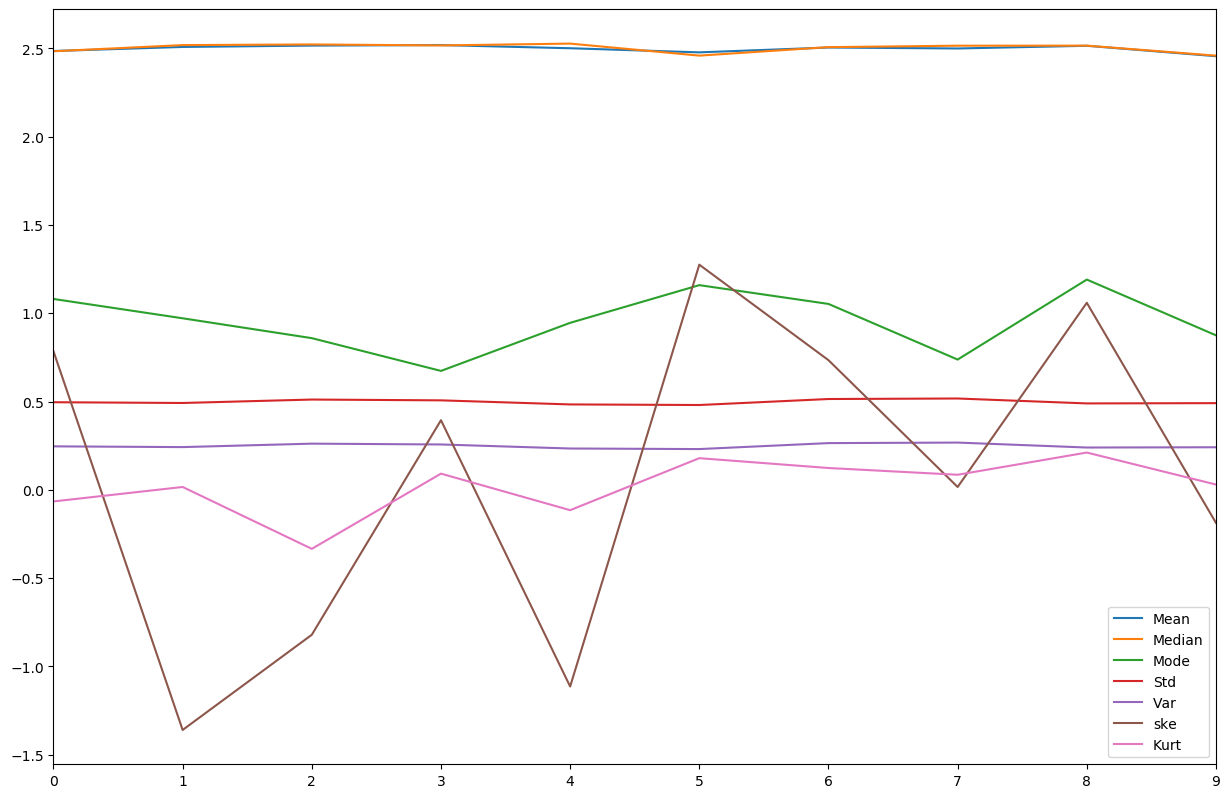

In [ ]:
df_Split_1.plot(figsize=(15,10))

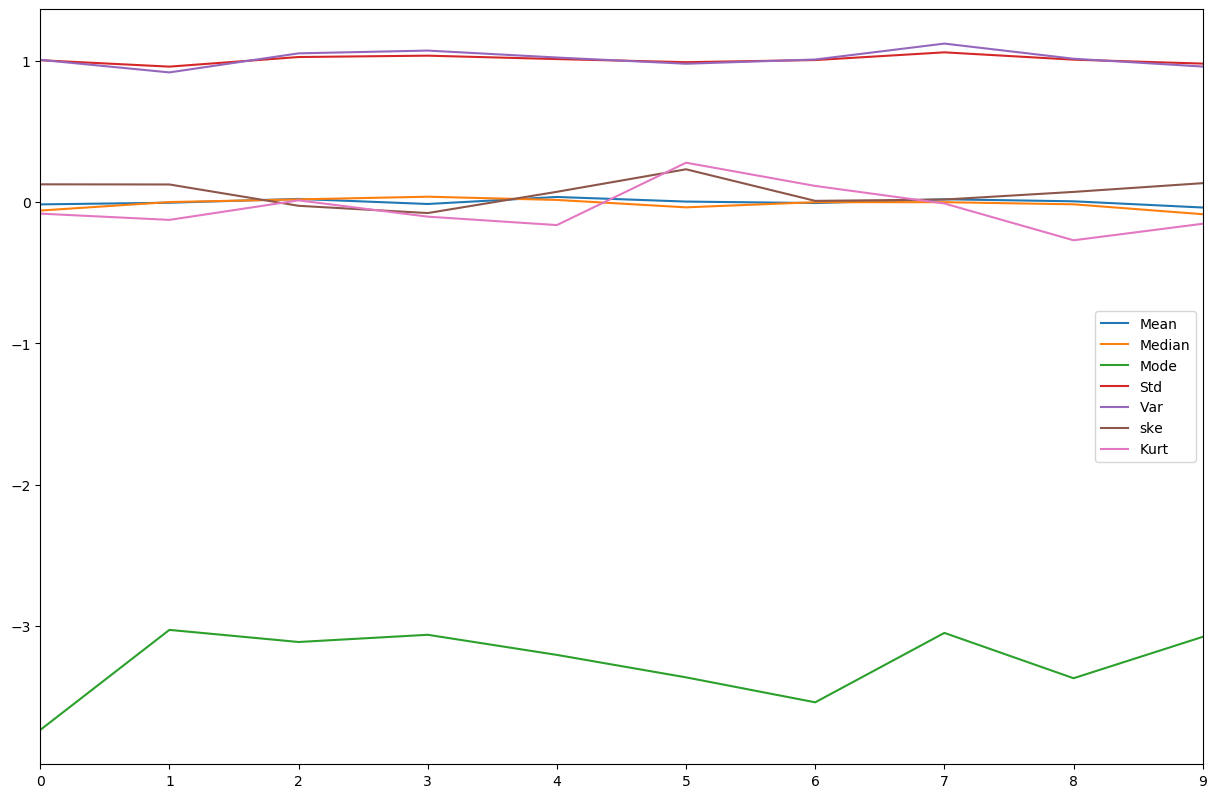

In [ ]:
df_Split_2.plot(figsize=(15,10))

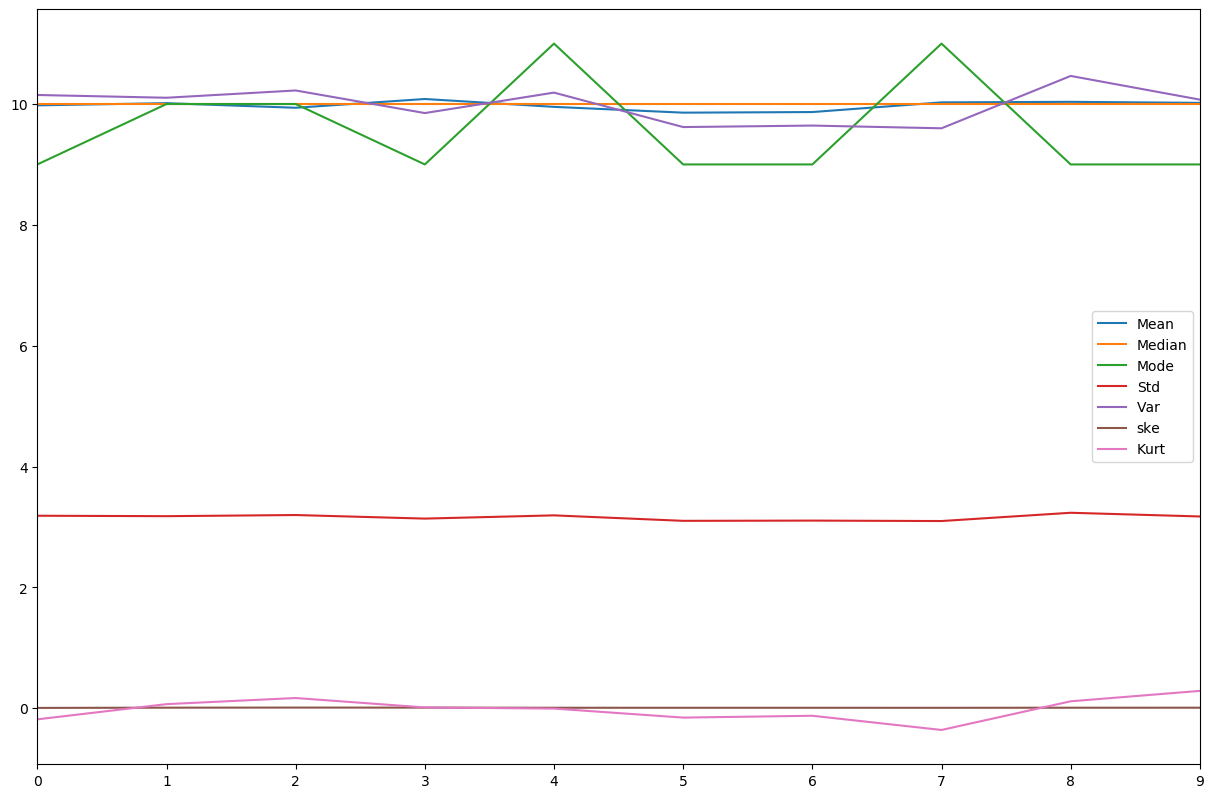

In [ ]:
df_Split_3.plot(figsize=(15,10))

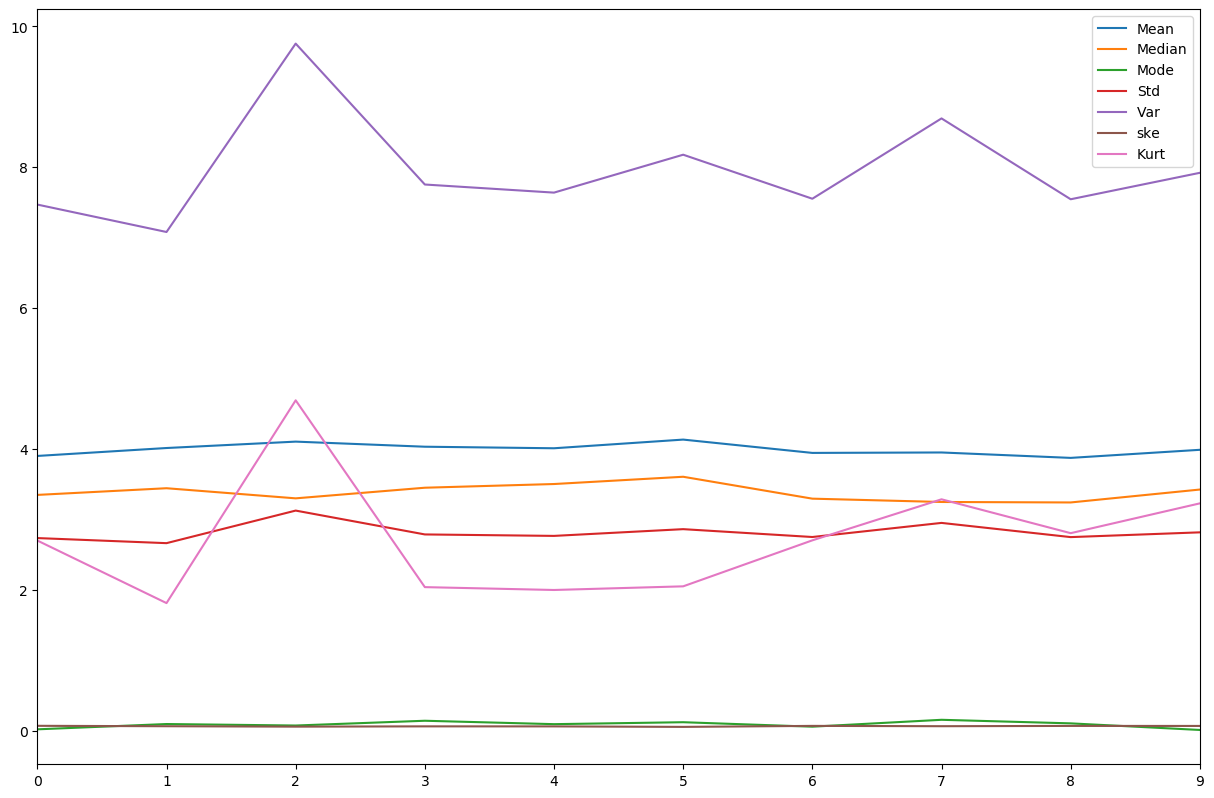

In [ ]:
df_Split_4.plot(figsize=(15,10))

In [ ]:
df_Split_4

,Mean,Median,Mode,Std,Var,ske,Kurt
0,3.899485,3.346140,0.016699,2.733061,7.469623,0.066637,2.697974
1,4.012036,3.440918,0.091924,2.660841,7.080076,0.060798,1.809594
2,4.102864,3.297277,0.070807,3.123435,9.755845,0.054943,4.689491
3,4.030506,3.448126,0.138496,2.784688,7.754487,0.058866,2.036320
4,4.008557,3.500635,0.090157,2.763947,7.639403,0.058419,1.995750
5,4.131724,3.603779,0.117741,2.859688,8.177816,0.051358,2.047629
6,3.942557,3.292763,0.054294,2.748184,7.552513,0.065573,2.700760
7,3.948765,3.245628,0.152022,2.948429,8.693234,0.061092,3.283655
8,3.871889,3.238889,0.101393,2.746818,7.545008,0.065133,2.802681
9,3.986646,3.422350,0.007759,2.814371,7.920682,0.064822,3.225989


In [ ]:
df2_Split = Stat_analysis_split(data2,n=1000)

Mean of the dataset is  0.49982054480013927
Median of the dataset is  0.4995974183299295
Mode of the dataset is  1.7677883346056689e-06
Standard Deviation of the dataset is  0.28862872628451114
Variance of the dataset is  0.08330654163661795
Skewness of the dataset is  0.03467675815020596
Kurtosis of the dataset is  -1.2000379891974313


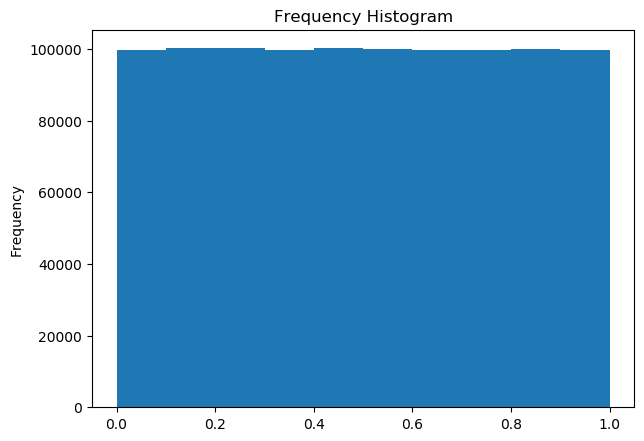

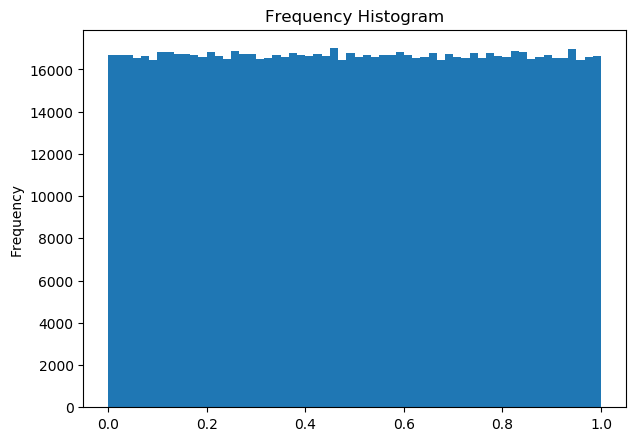

In [ ]:
Stat_analysis(data2)
# plt.title("Data for Part B")

Mean of the dataset is  0.499820544800124
Median of the dataset is  0.5000277711329199
Mode of the dataset is  0.4714835590844531
Standard Deviation of the dataset is  0.009395182303974625
Variance of the dataset is  8.826945052491794e-05
Skewness of the dataset is  4646.507315083941
Kurtosis of the dataset is  -0.022488382121157002


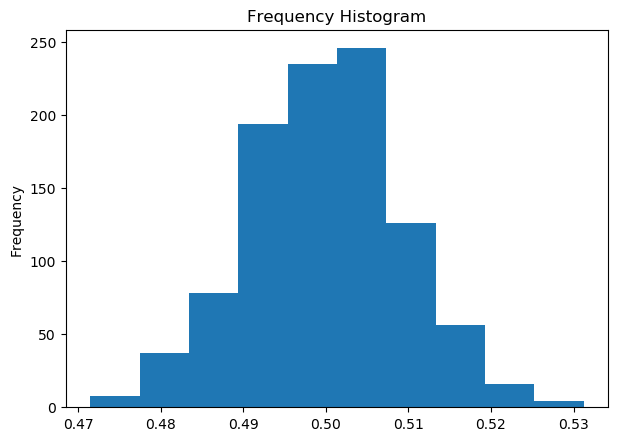

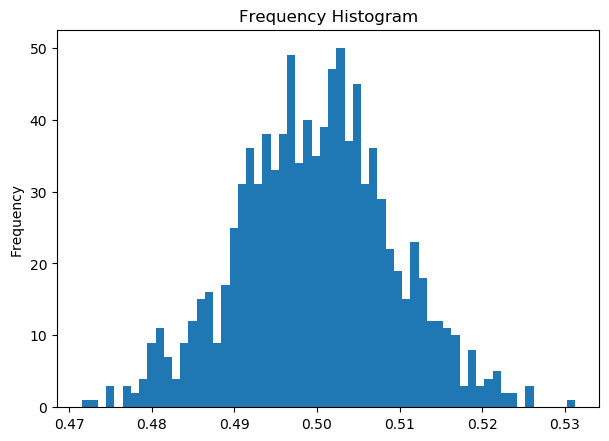

In [ ]:
Stat_analysis(df2_Split['Mean'])